In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import parallel_coordinates

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Load the Data

In [3]:
df = pd.read_csv("processed_data.csv")

# Quick look at the data

In [4]:
print("Dataset Shape:", df.shape)
print("First five rows:")
print(df.head())

Dataset Shape: (2510, 33)
First five rows:
      Video ID                                              Title  Duration  \
0  KbiwL74KyJQ                          Shrek 5 Cast Announcement        28   
1  8B1EtVPBSMw                  A Minecraft Movie | Final Trailer       151   
2  W7FTkUFU7nw                       Pokémon Presents | 2.27.2025      1156   
3  r5VRqWkFpEQ  LISA - FUTW (Vixi Solo Version) (Official Musi...       228   
4  vONxgCQWZCA  YoungBoy Never Broke Again - 5 Night [Official...       196   

      Views     Likes  Comments           Publication Time Region  \
0  0.053542  0.034124  0.000000  2025-02-27 16:01:18+00:00     US   
1  0.080644  0.052269  0.132190  2025-02-27 20:00:04+00:00     US   
2  0.024396  0.034106  0.106517  2025-02-27 14:00:06+00:00     US   
3  0.055906  0.221836  0.382255  2025-02-28 05:01:26+00:00     US   
4  0.003523  0.013293  0.033900  2025-02-28 06:32:53+00:00     US   

   Topic_Autos & Vehicles  Topic_Comedy  ...  Language_Arabic  \
0 

# 2. Basic Information & Summary

In [5]:
print("\nData Types & Non-null counts:")
print(df.info())

print("\nDescriptive statistics for numeric columns:")
print(df.describe())


Data Types & Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Video ID                     2510 non-null   object 
 1   Title                        2510 non-null   object 
 2   Duration                     2510 non-null   int64  
 3   Views                        2510 non-null   float64
 4   Likes                        2510 non-null   float64
 5   Comments                     2510 non-null   float64
 6   Publication Time             2510 non-null   object 
 7   Region                       2510 non-null   object 
 8   Topic_Autos & Vehicles       2510 non-null   int64  
 9   Topic_Comedy                 2510 non-null   int64  
 10  Topic_Education              2510 non-null   int64  
 11  Topic_Entertainment          2510 non-null   int64  
 12  Topic_Film & Animation       2510 non-null   

# Identify categorical and numerical columns

In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['Video ID', 'Title', 'Publication Time', 'Region']
Numerical columns: ['Duration', 'Views', 'Likes', 'Comments', 'Topic_Autos & Vehicles', 'Topic_Comedy', 'Topic_Education', 'Topic_Entertainment', 'Topic_Film & Animation', 'Topic_Gaming', 'Topic_Howto & Style', 'Topic_Music', 'Topic_News & Politics', 'Topic_Nonprofits & Activism', 'Topic_People & Blogs', 'Topic_Pets & Animals', 'Topic_Science & Technology', 'Topic_Sports', 'Topic_Travel & Events', 'Language_Arabic', 'Language_English', 'Language_French', 'Language_German', 'Language_Hindi', 'Language_Japanese', 'Language_Korean', 'Language_Portuguese', 'Language_Russian', 'Language_Spanish']


# For categorical data: count, unique values and frequency distribution

In [7]:
for col in categorical_cols:
    print(f"\nValue counts for categorical column: {col}")
    print(df[col].value_counts())


Value counts for categorical column: Video ID
Video ID
r5VRqWkFpEQ    11
mFuyX1XgJFg     9
SD2UiX1jpd8     8
KbiwL74KyJQ     8
eWAdpUyzCkI     8
               ..
lnsSJw9_I_A     1
zG9q4dGsVJA     1
wm0tcx_Rfos     1
fR9_I-9fNjM     1
eXr3_3-_izA     1
Name: count, Length: 1856, dtype: int64

Value counts for categorical column: Title
Title
LISA - FUTW (Vixi Solo Version) (Official Music Video)    11
Introducing iPhone 16e - February 19                       9
IS THIS THE BEST BRAWLER EVER?!                            8
Shrek 5 Cast Announcement                                  8
JENNIE, Doechii - ExtraL (Official Video)                  8
                                                          ..
CES JEUX QUI M'ONT MARQUÉ : STRONGHOLD                     1
Oboy  -  Shadowban #2 (Margiela)                           1
Je teste une expérience à -80°C                            1
Comment la startup de Marc Simoncini a déraillé            1
TIMEO - MA REINE (clip officiel)              

# 3. Univariate Visualizations

### For numerical columns: histogram (with KDE) and boxplot to inspect distribution, central tendency, spread, modality and outliers

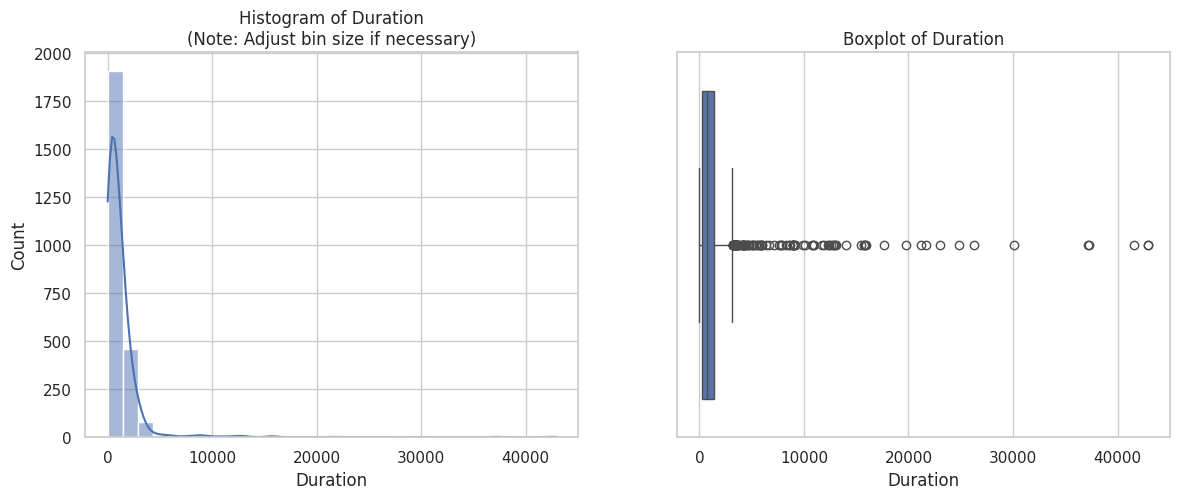

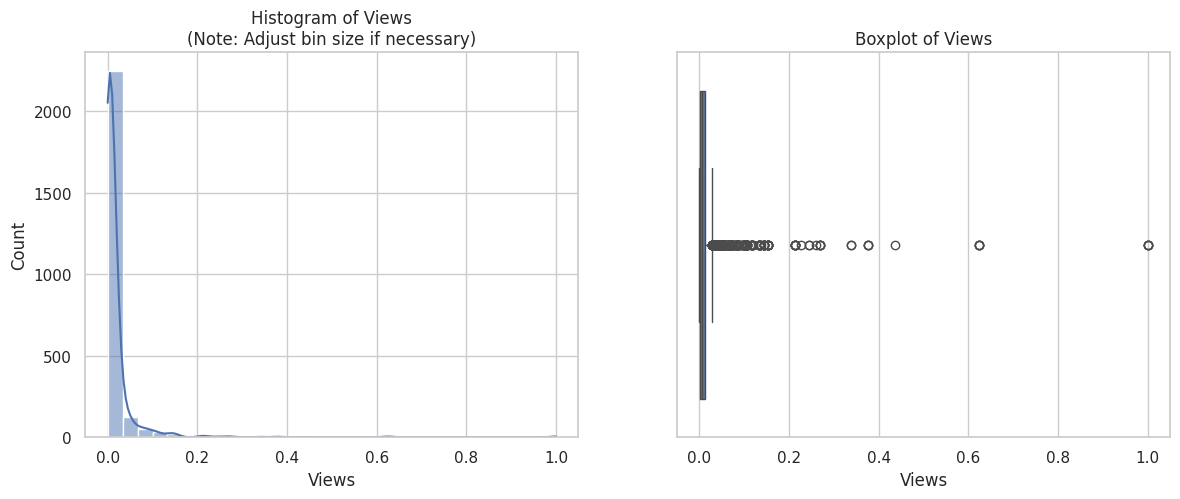

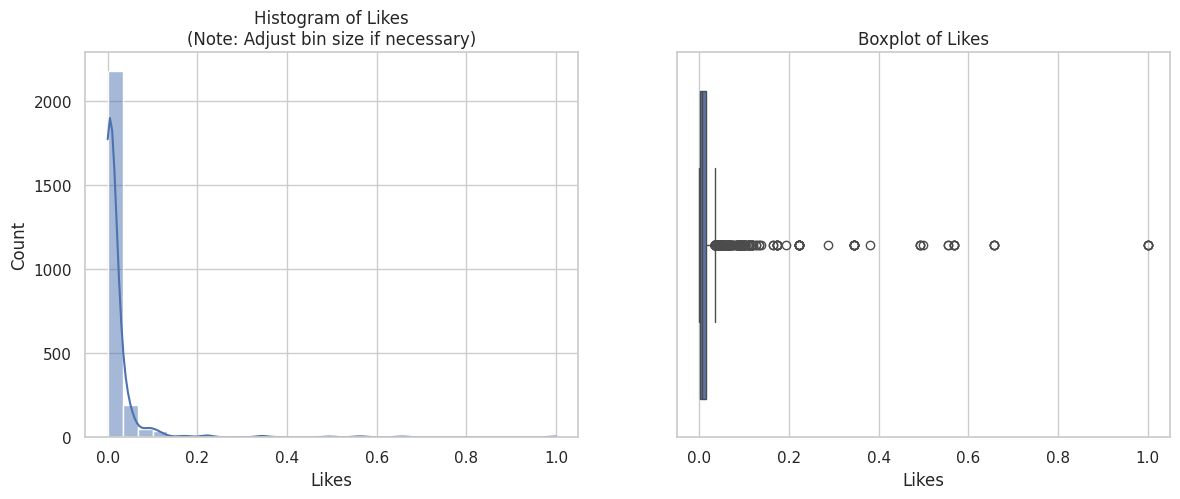

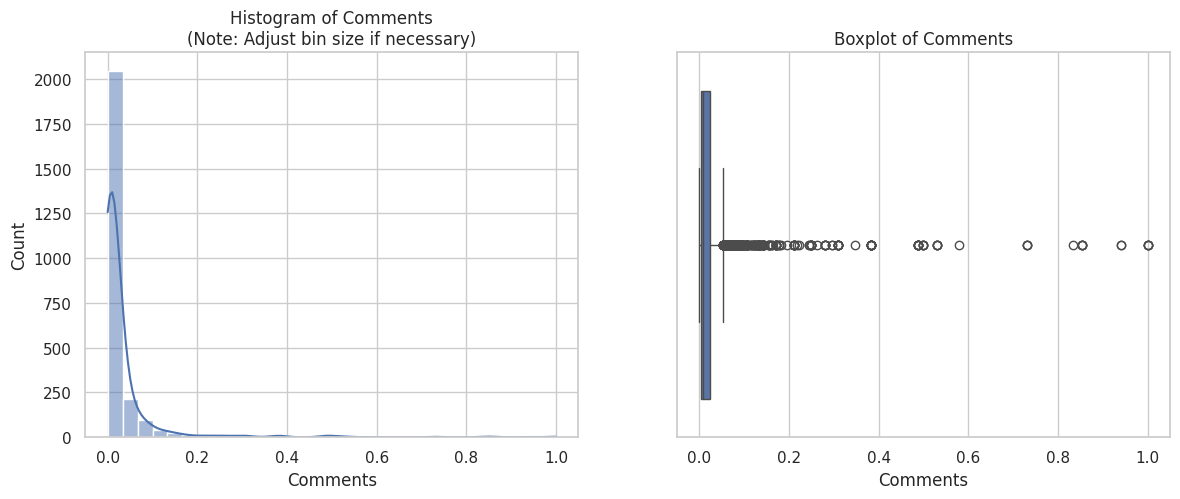

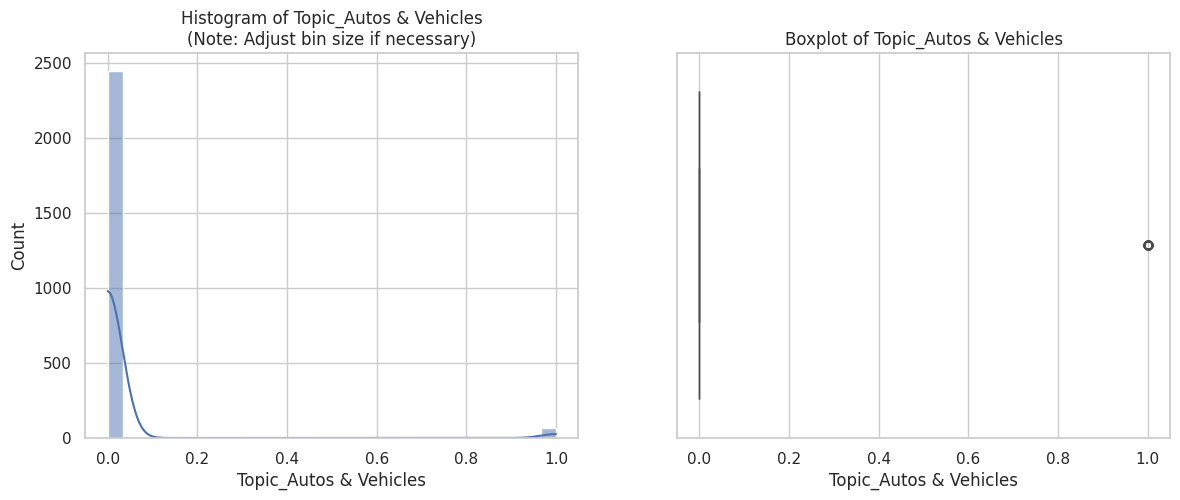

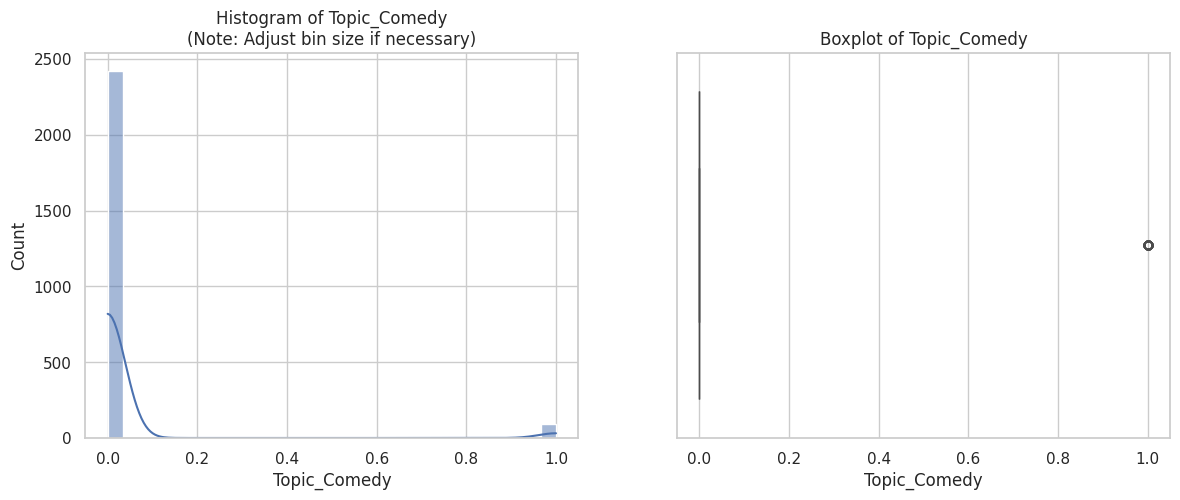

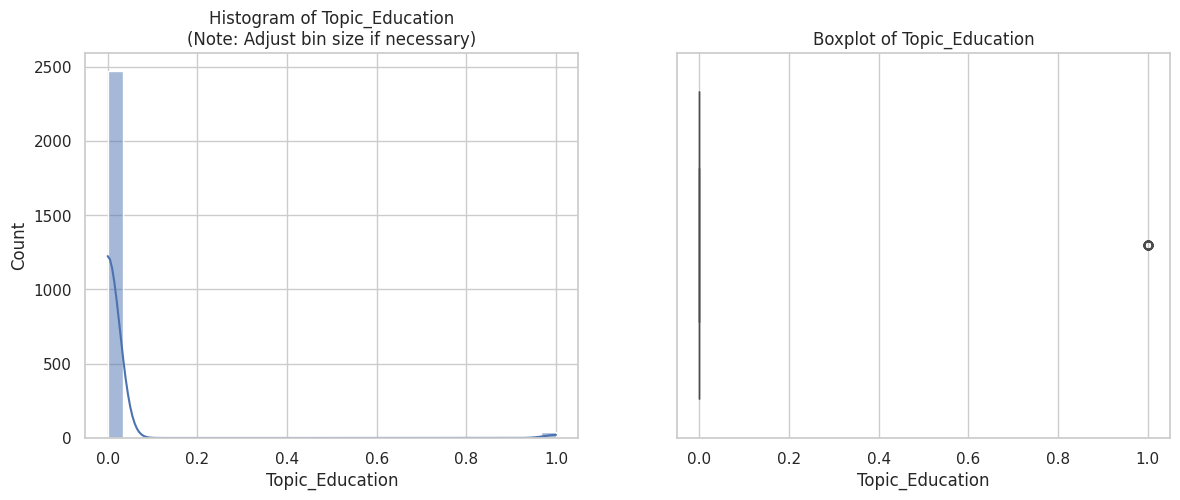

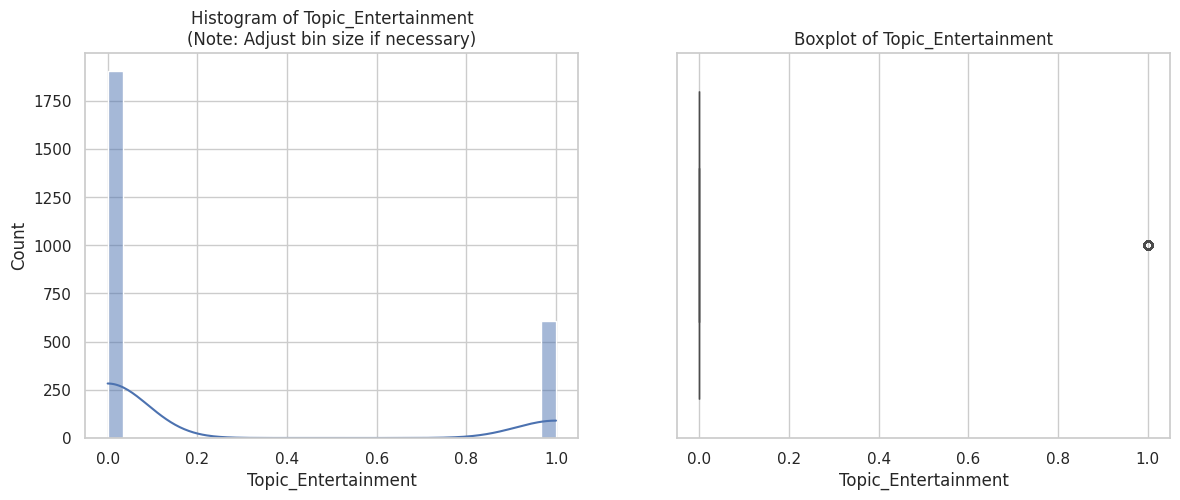

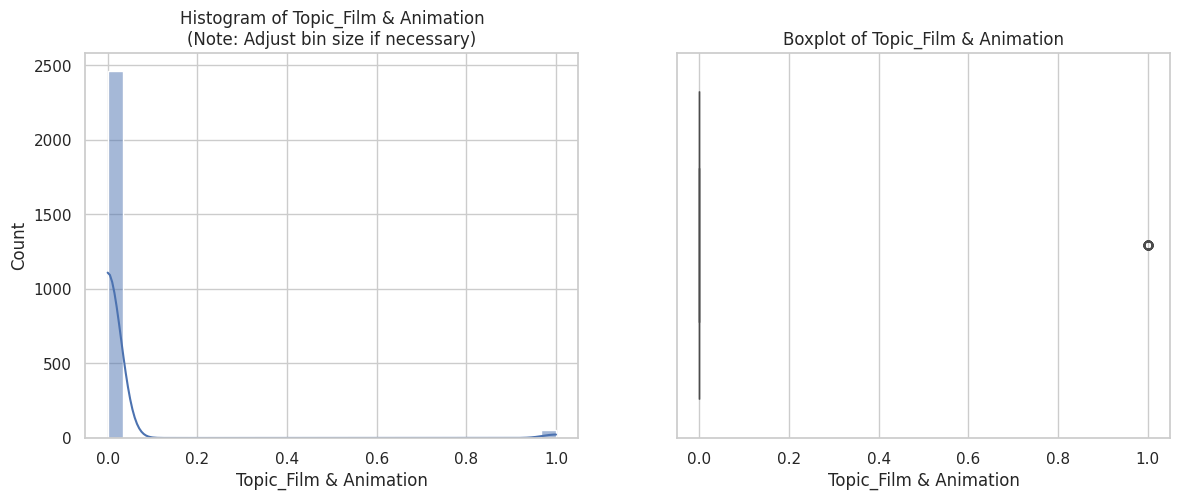

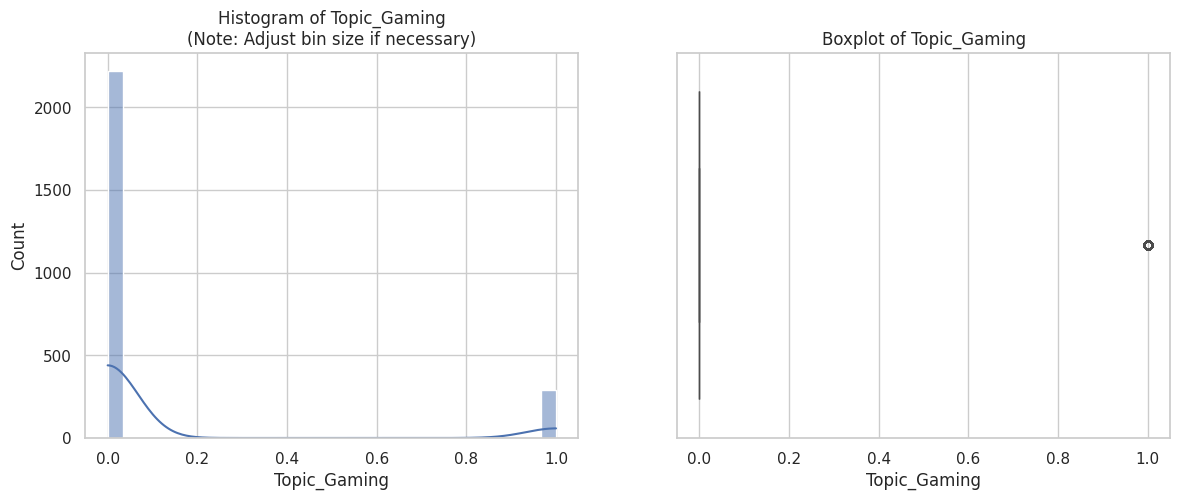

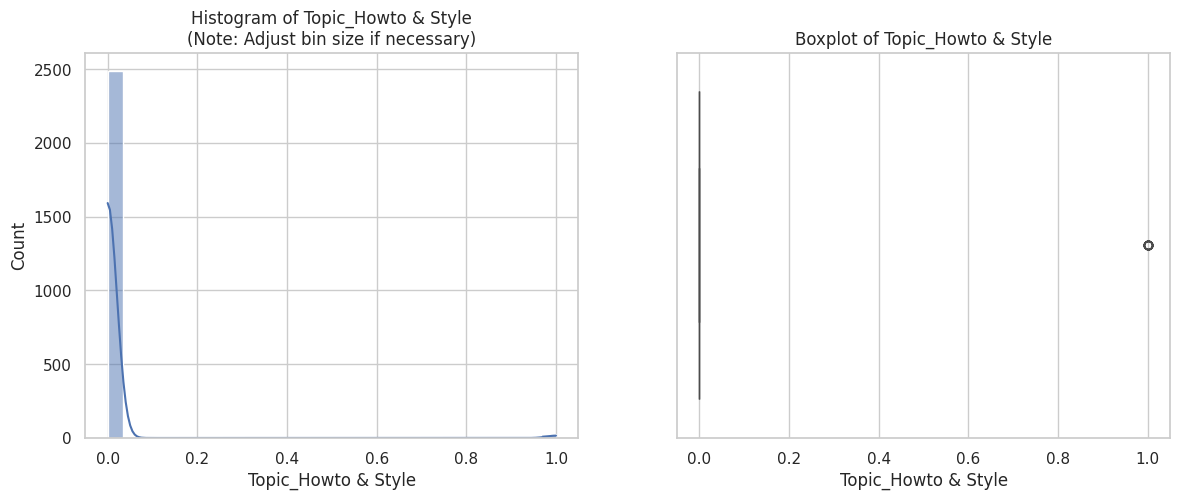

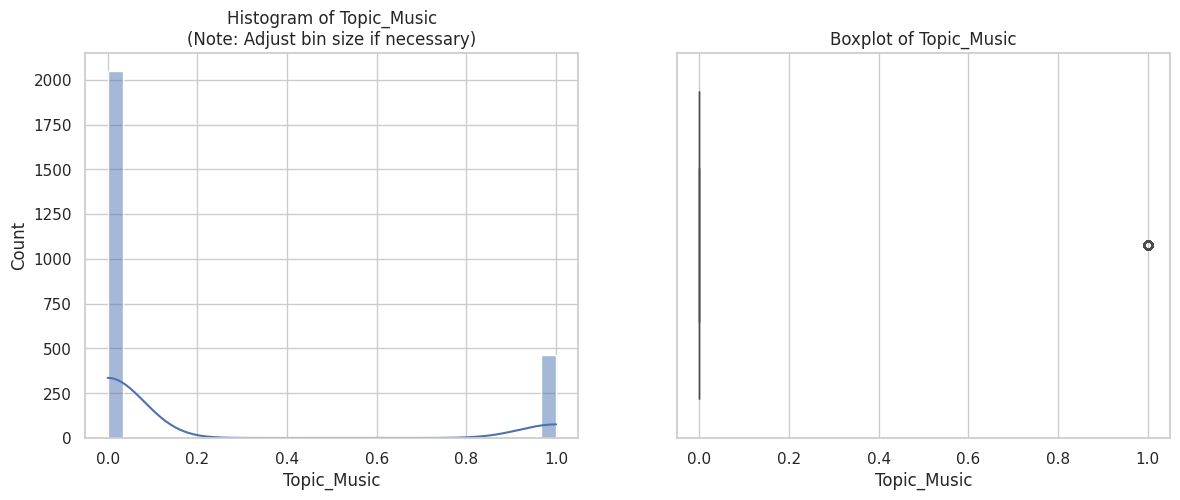

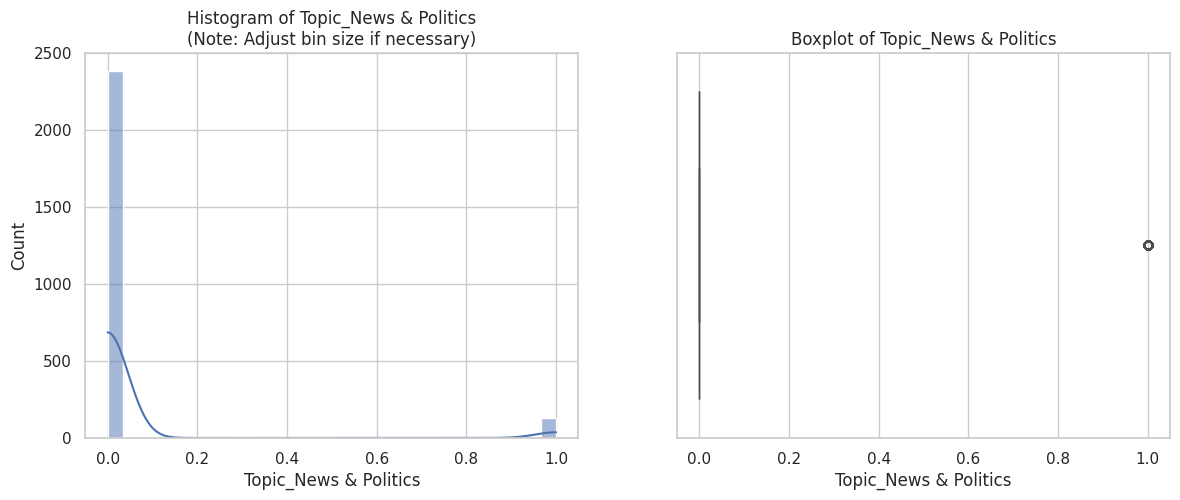

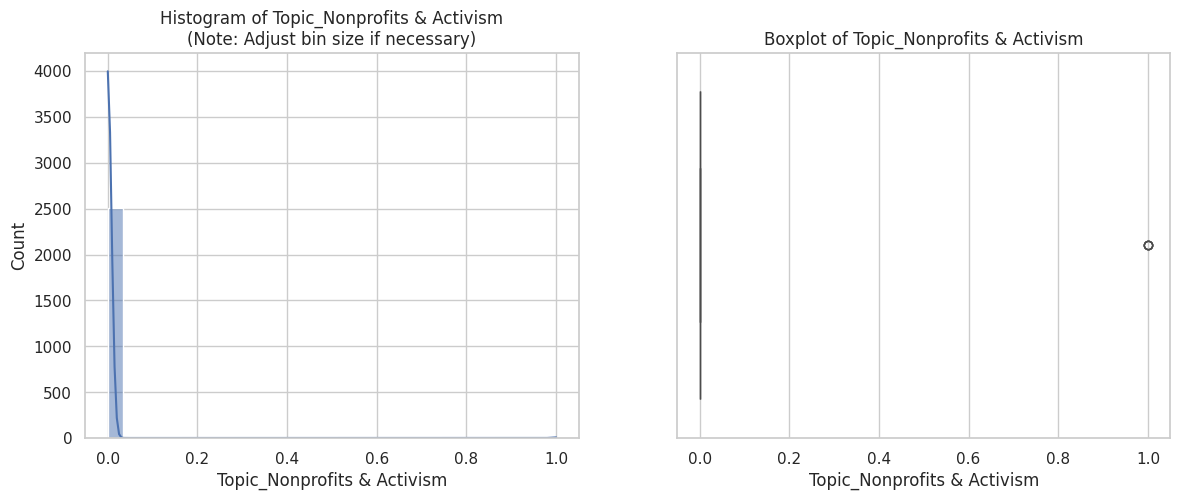

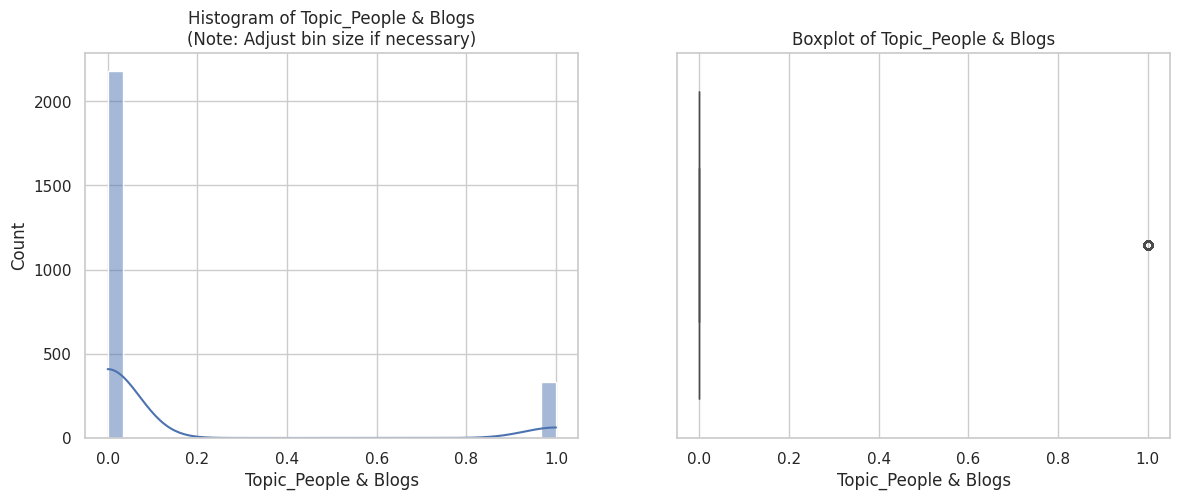

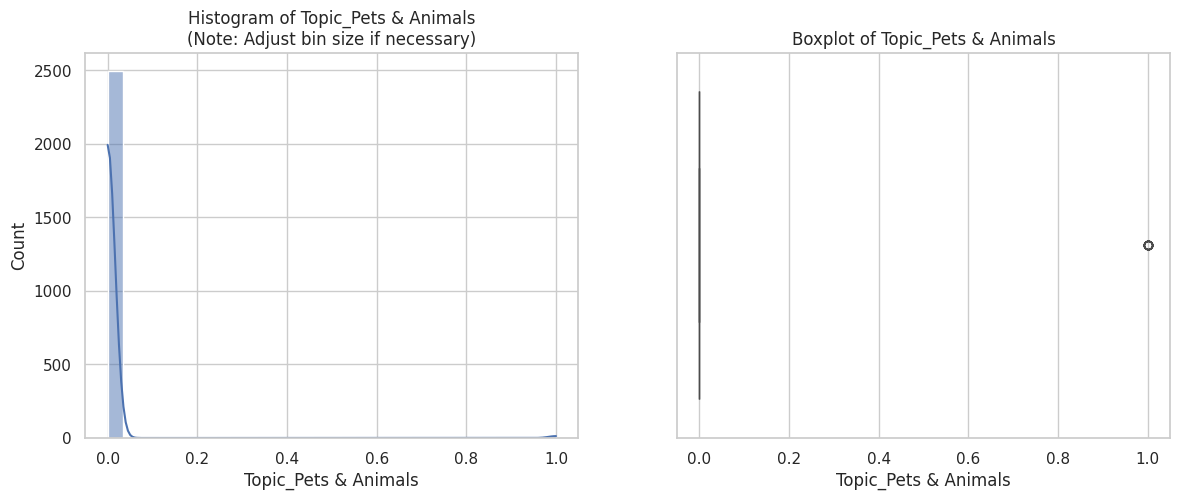

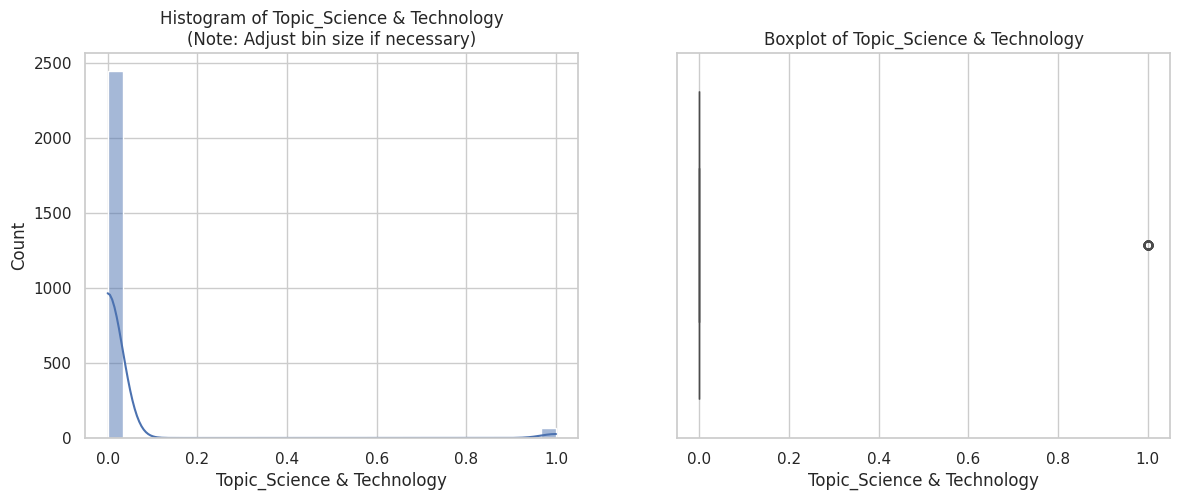

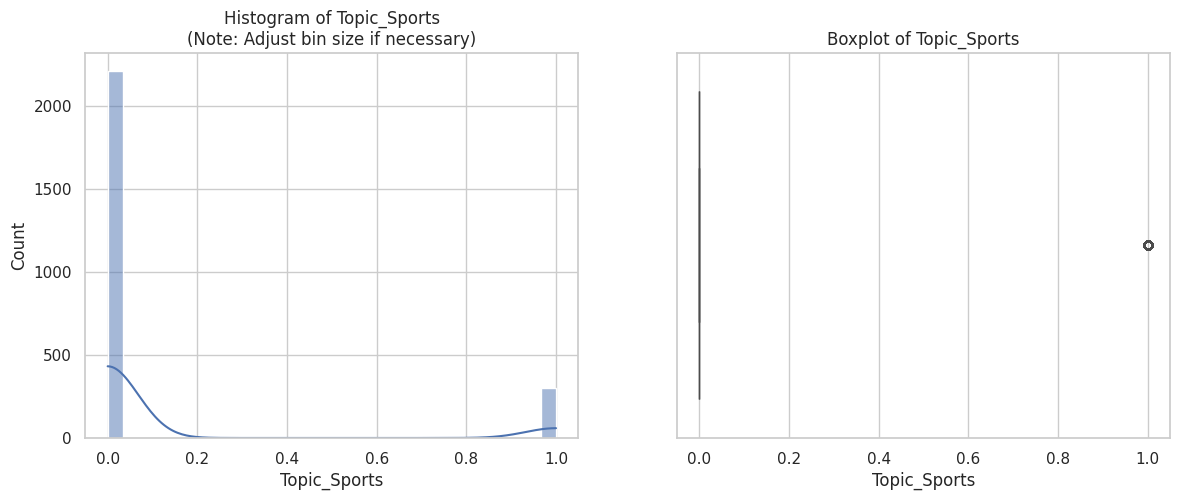

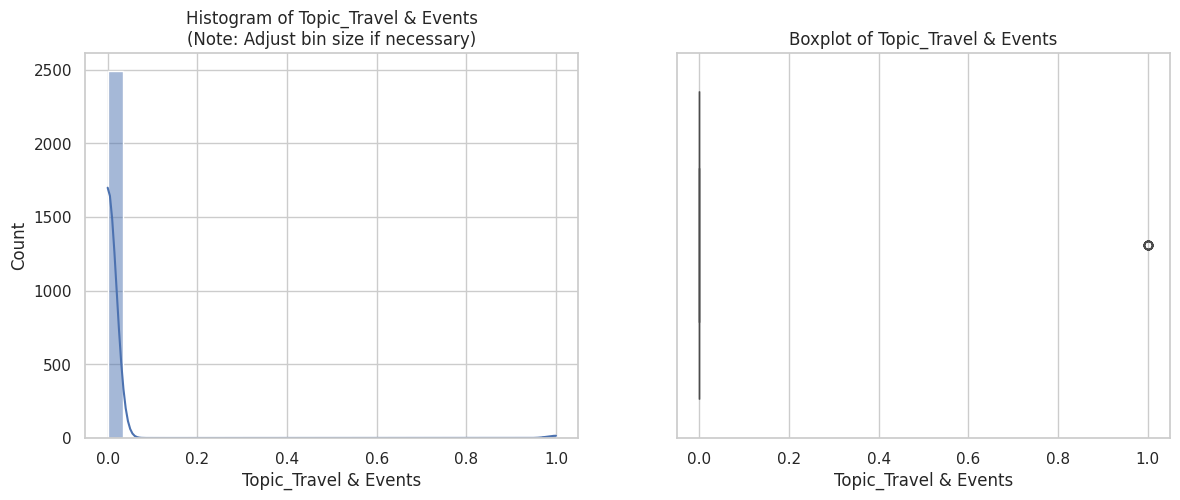

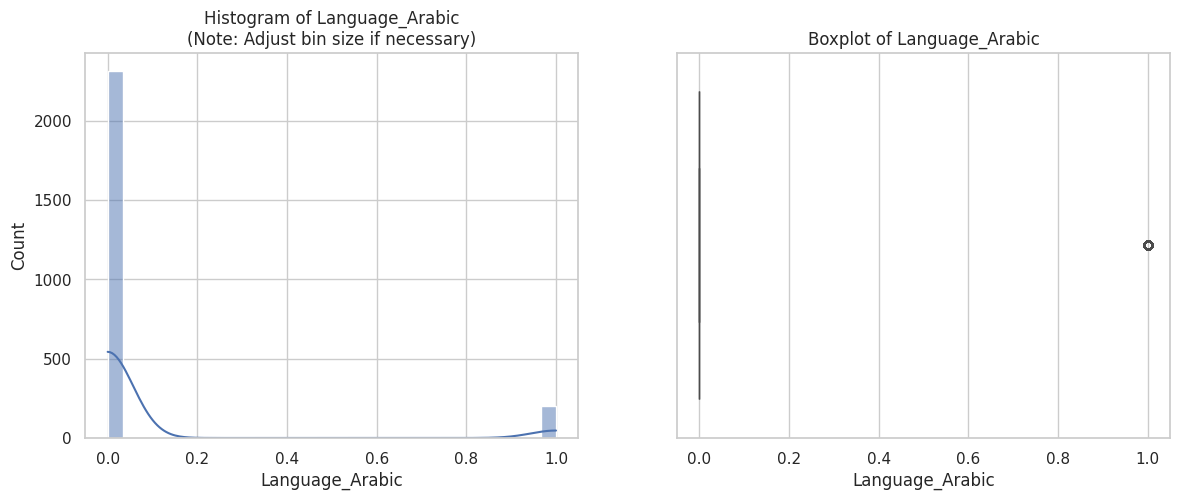

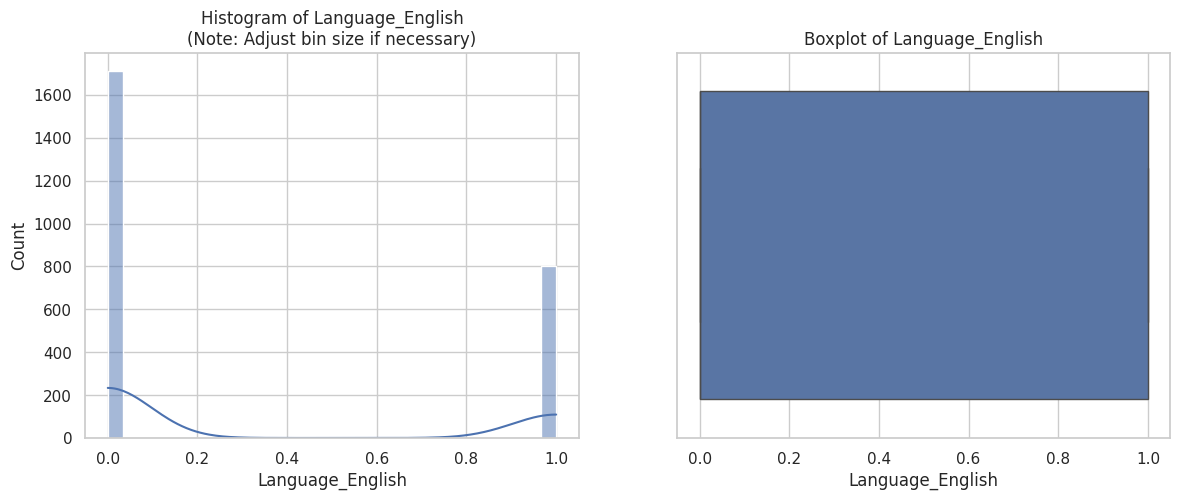

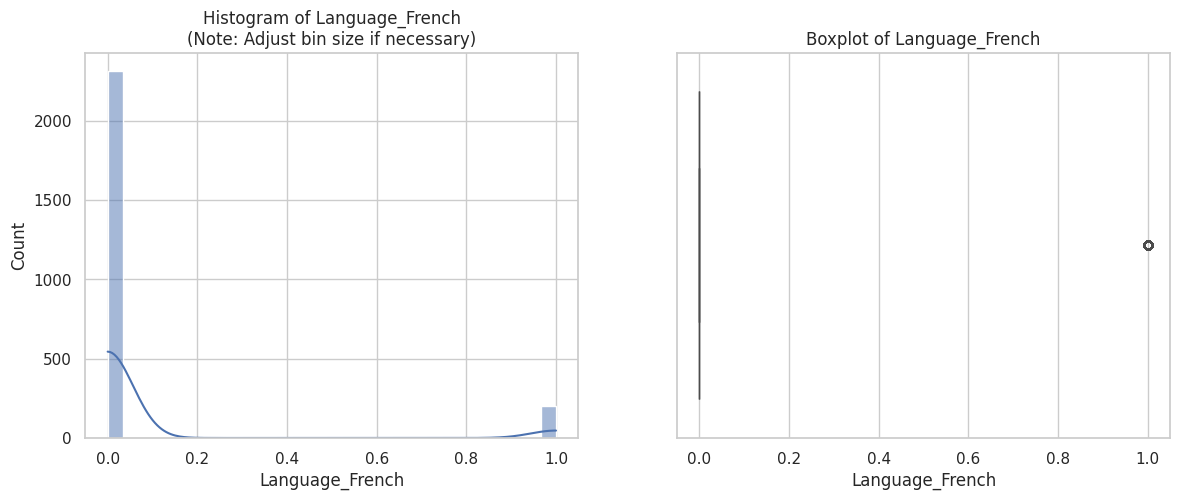

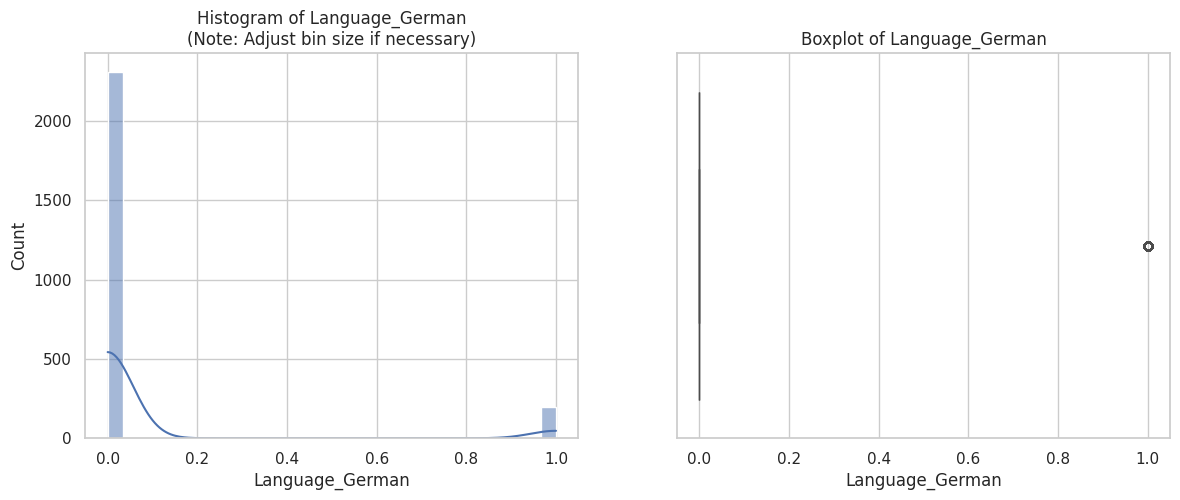

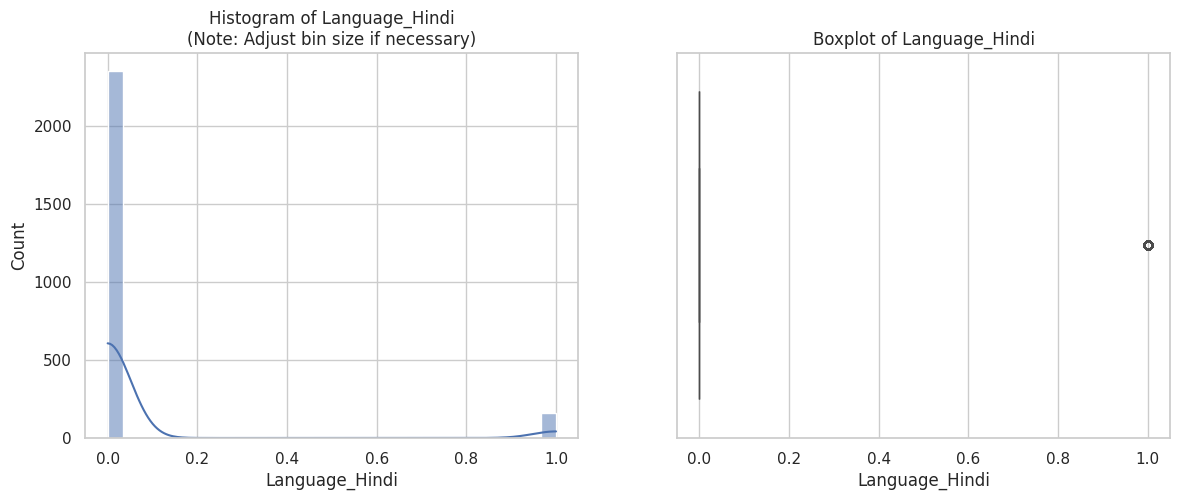

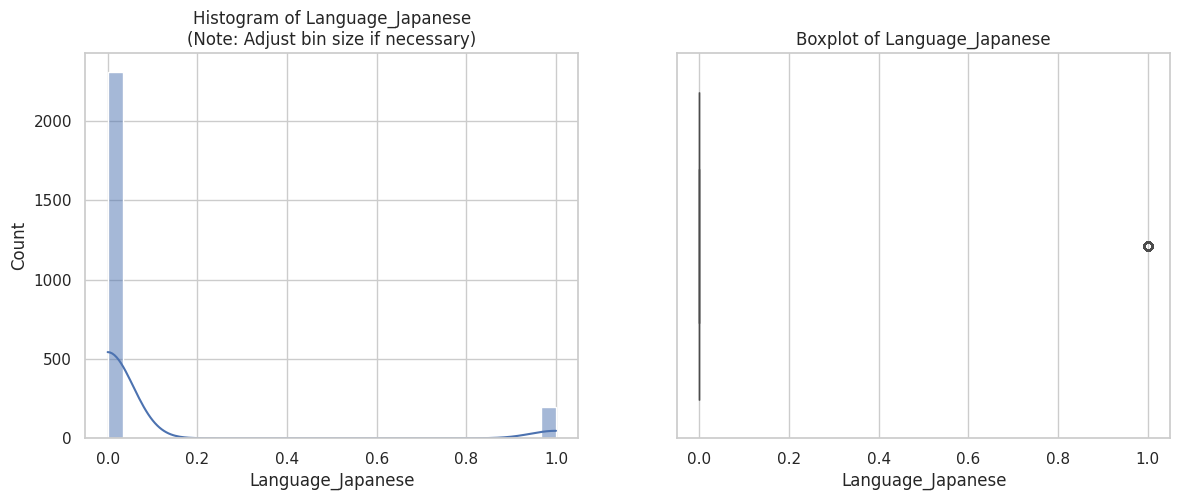

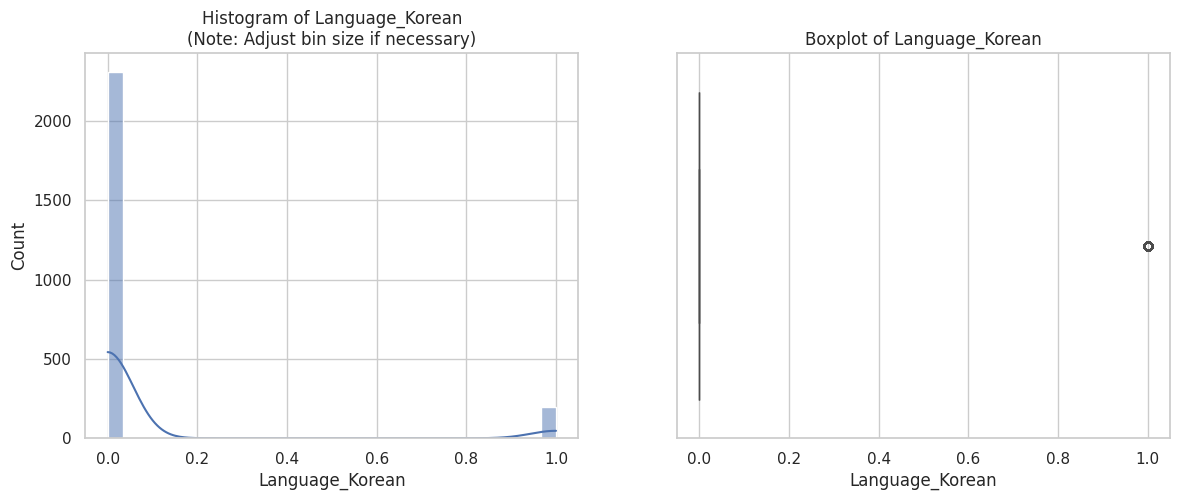

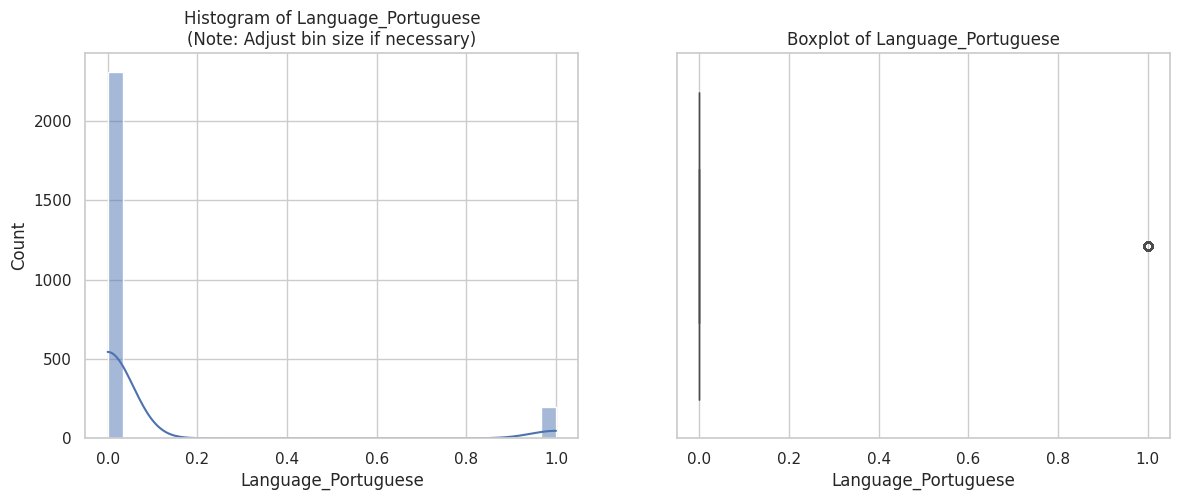

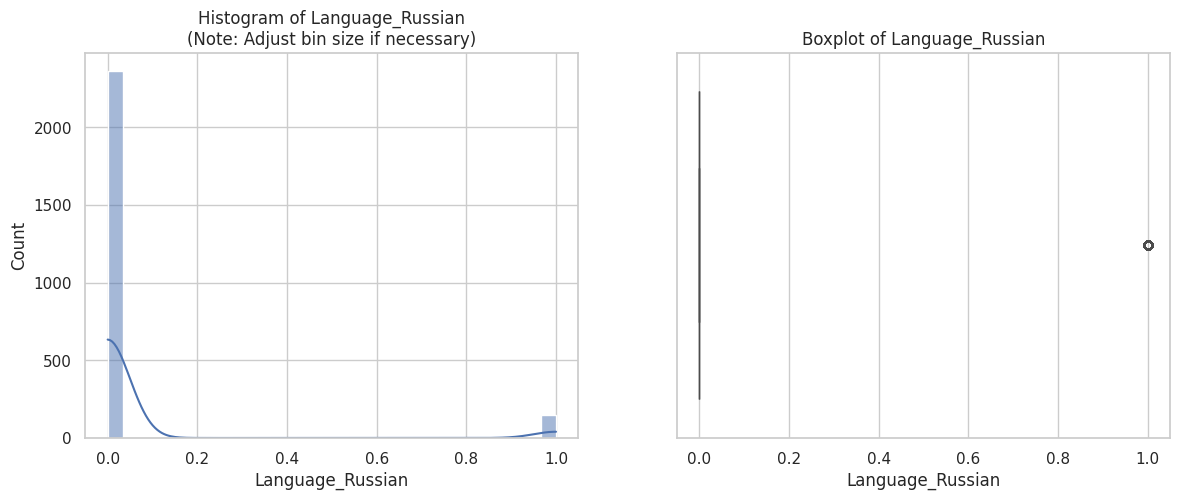

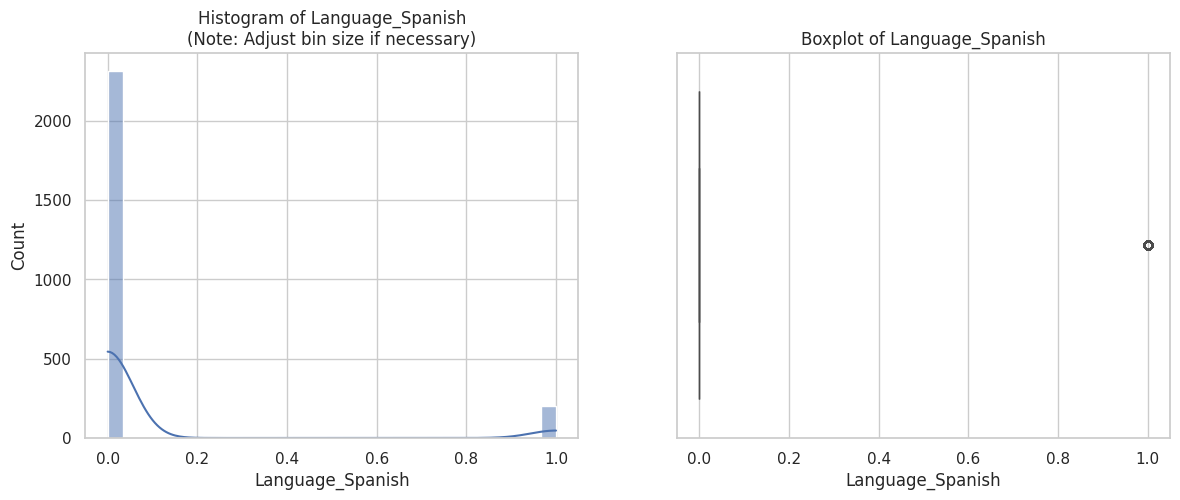

In [9]:
for col in numerical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram with kernel density estimation
    sns.histplot(df[col], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {col}\n(Note: Adjust bin size if necessary)')
    
    # Boxplot to show distribution and outliers
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    
    plt.show()

### For categorical columns: count plots to show frequency of categories

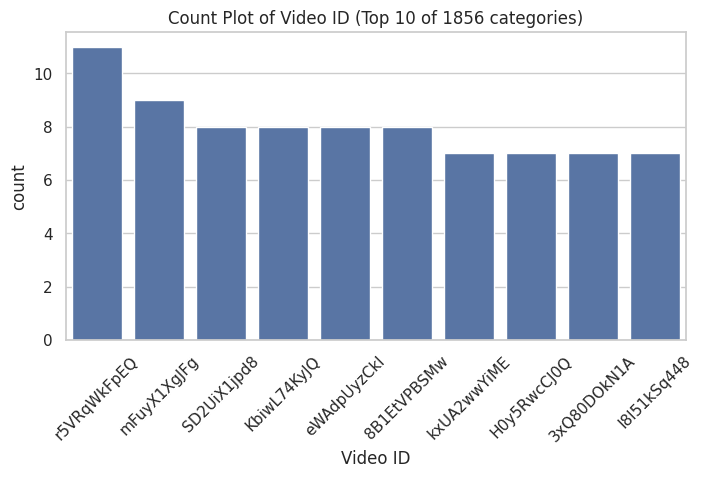

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


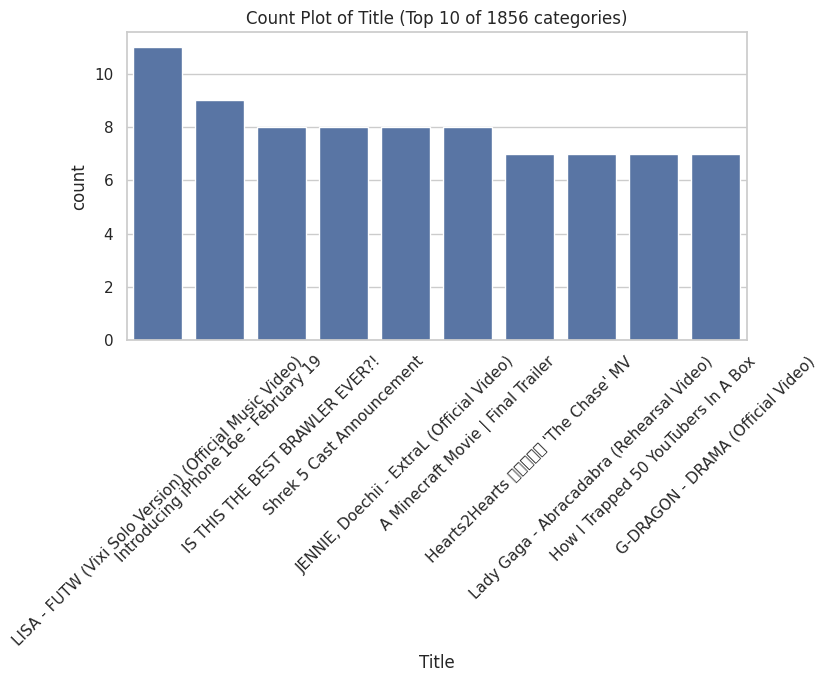

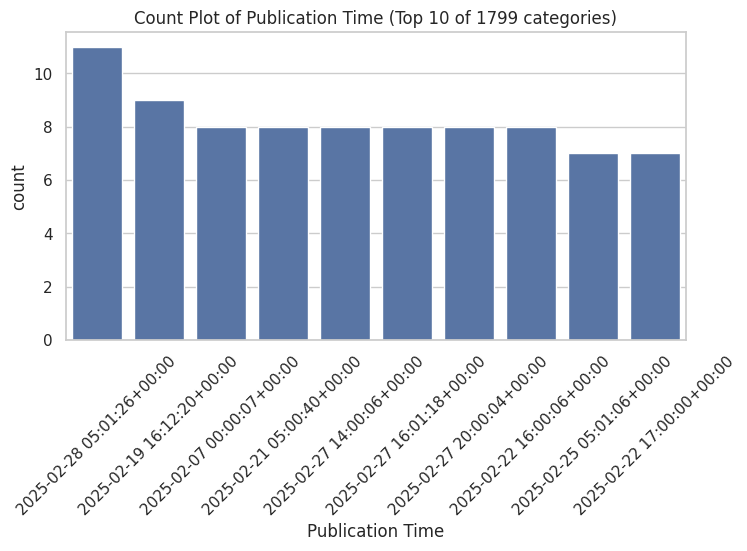

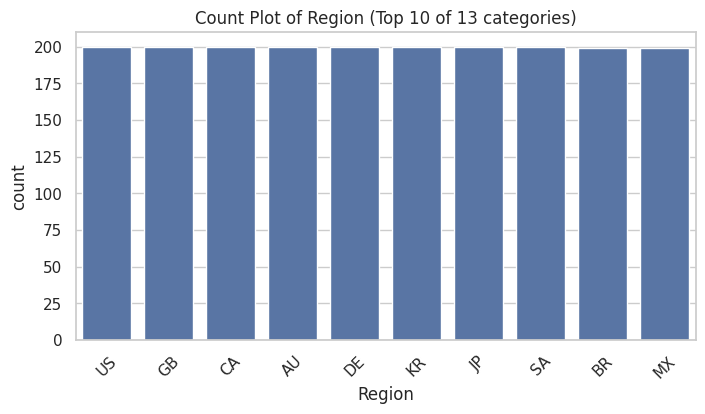

In [14]:
max_categories_to_show = 10

for col in categorical_cols:
    # Count how many unique values the column has
    n_unique = df[col].nunique()
    
    if n_unique > max_categories_to_show:
        # Get top 'max_categories_to_show' categories
        top_categories = df[col].value_counts().nlargest(max_categories_to_show).index
        
        # Filter the DataFrame to include only rows whose category is in the top list
        filtered_df = df[df[col].isin(top_categories)]
        
        plt.figure(figsize=(8, 4))
        sns.countplot(data=filtered_df, x=col, order=top_categories)
        plt.title(f'Count Plot of {col} (Top {max_categories_to_show} of {n_unique} categories)')
        plt.xticks(rotation=45)
        plt.show()
    else:
        # Plot all categories
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col} (All {n_unique} categories)')
        plt.xticks(rotation=45)
        plt.show()

# 4. Bivariate and Multivariate Analysis

# Scatterplot matrix (pairplot) for numerical features to explore pairwise relationships

Too many numerical columns (29). Plotting only the first 5 columns.
Dataset is large (2510 rows). Using a random sample of 1000 rows for pairplot.


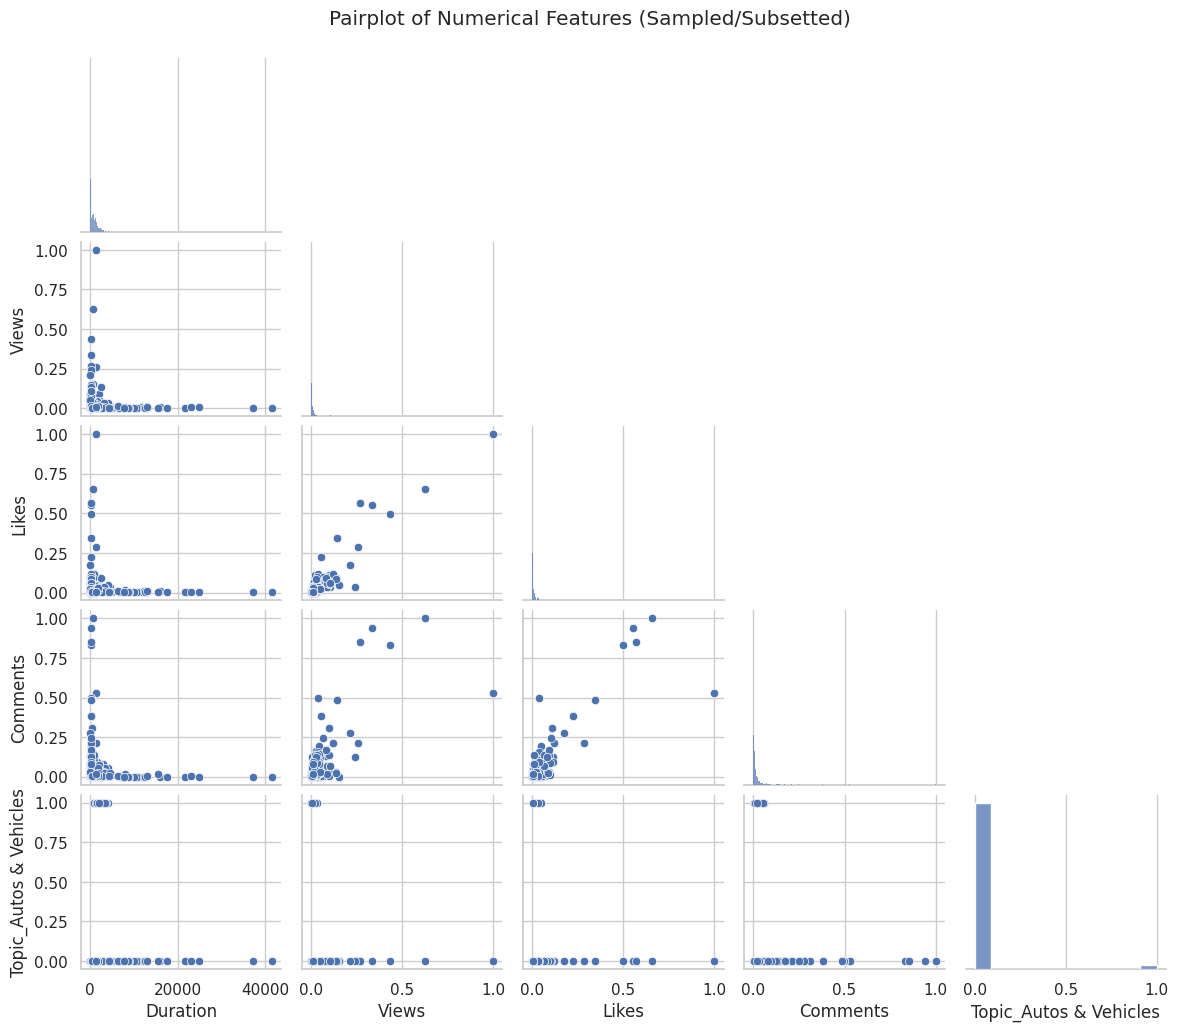

In [15]:
# 4. Bivariate and Multivariate Analysis
# =====================================

# Only create a pairplot if we have more than one numerical column
if len(numerical_cols) > 1:
    # 1) Limit the number of numeric columns to a manageable subset
    max_cols_for_pairplot = 5
    if len(numerical_cols) > max_cols_for_pairplot:
        # Pick the first N numeric columns, or choose any logic you prefer (e.g., columns with highest variance)
        subset_cols = numerical_cols[:max_cols_for_pairplot]
        print(f"Too many numerical columns ({len(numerical_cols)}). "
              f"Plotting only the first {max_cols_for_pairplot} columns.")
    else:
        subset_cols = numerical_cols
    
    # 2) Sample rows if the dataset is very large
    max_rows_for_pairplot = 1000
    if df.shape[0] > max_rows_for_pairplot:
        sample_df = df[subset_cols].sample(n=max_rows_for_pairplot, random_state=42)
        print(f"Dataset is large ({df.shape[0]} rows). "
              f"Using a random sample of {max_rows_for_pairplot} rows for pairplot.")
    else:
        sample_df = df[subset_cols]
    
    # Create the pairplot with a smaller subplot size and corner=True to reduce redundancy
    sns.pairplot(sample_df, corner=True, height=2, aspect=1.2)
    plt.suptitle("Pairplot of Numerical Features (Sampled/Subsetted)", y=1.03)
    plt.show()
else:
    print("Not enough numerical columns for a pairplot.")


# Correlation heatmaps using different correlation methods (Pearson, Spearman, Kendall)

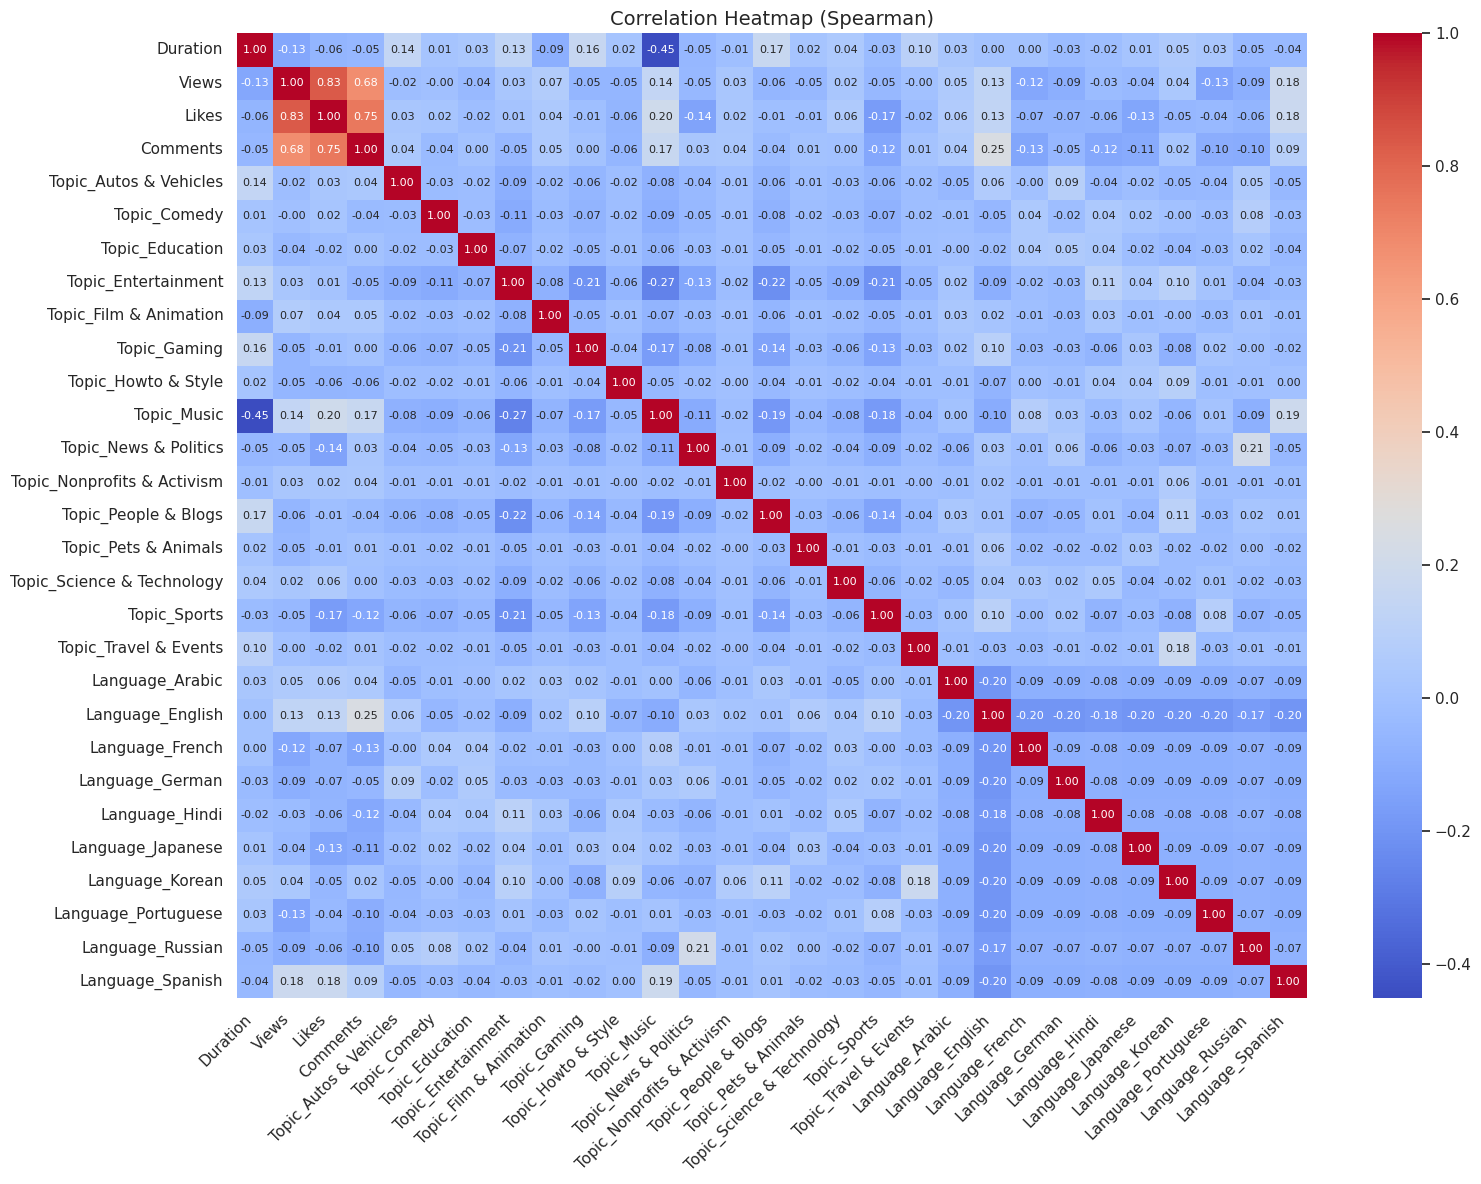

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose Spearman correlation based on normality test results
chosen_method = 'spearman'

# Compute the correlation matrix using Spearman correlation
corr_matrix = df[numerical_cols].corr(method=chosen_method)

# Plot the correlation heatmap with improved readability
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",
    annot_kws={"size": 8}
)
plt.xticks(rotation=45, ha="right")
plt.title(f'Correlation Heatmap ({chosen_method.capitalize()})', fontsize=14)
plt.tight_layout()
plt.show()


# 5. Time Series Analysis (if applicable)

Dataset Shape: (2510, 33)

First 5 Rows:
      Video ID                                              Title  Duration  \
0  KbiwL74KyJQ                          Shrek 5 Cast Announcement        28   
1  8B1EtVPBSMw                  A Minecraft Movie | Final Trailer       151   
2  W7FTkUFU7nw                       Pokémon Presents | 2.27.2025      1156   
3  r5VRqWkFpEQ  LISA - FUTW (Vixi Solo Version) (Official Musi...       228   
4  vONxgCQWZCA  YoungBoy Never Broke Again - 5 Night [Official...       196   

      Views     Likes  Comments           Publication Time Region  \
0  0.053542  0.034124  0.000000  2025-02-27 16:01:18+00:00     US   
1  0.080644  0.052269  0.132190  2025-02-27 20:00:04+00:00     US   
2  0.024396  0.034106  0.106517  2025-02-27 14:00:06+00:00     US   
3  0.055906  0.221836  0.382255  2025-02-28 05:01:26+00:00     US   
4  0.003523  0.013293  0.033900  2025-02-28 06:32:53+00:00     US   

   Topic_Autos & Vehicles  Topic_Comedy  ...  Language_Arabic  \
0   

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


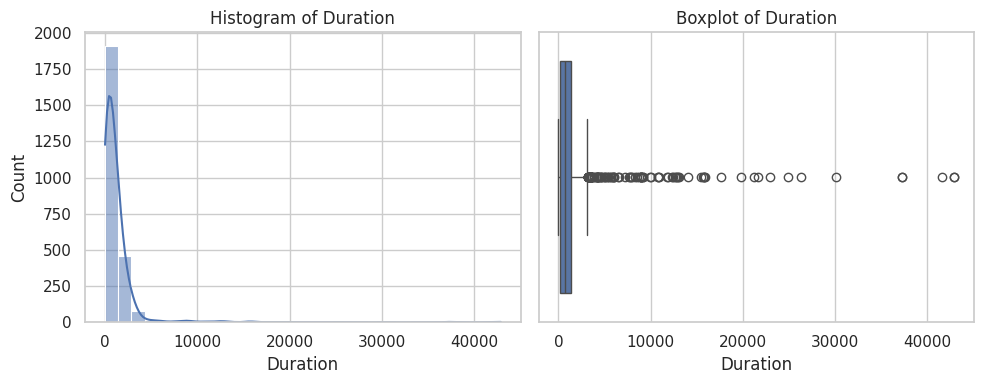

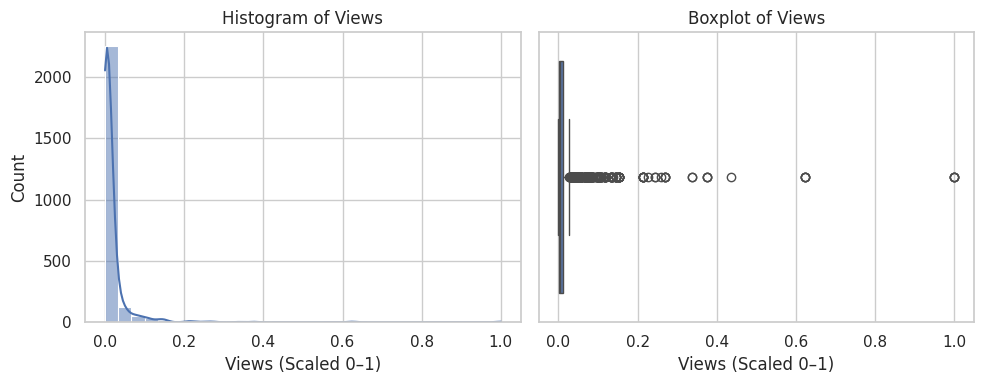

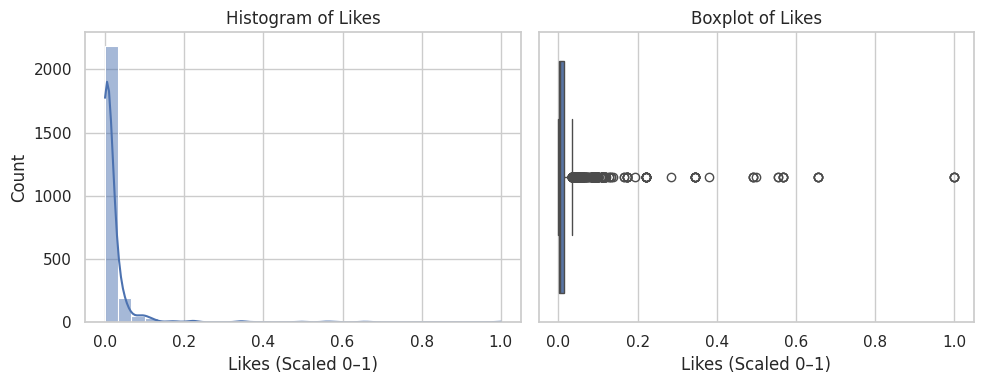


Categorical Column: Video ID, Unique Values: 1856


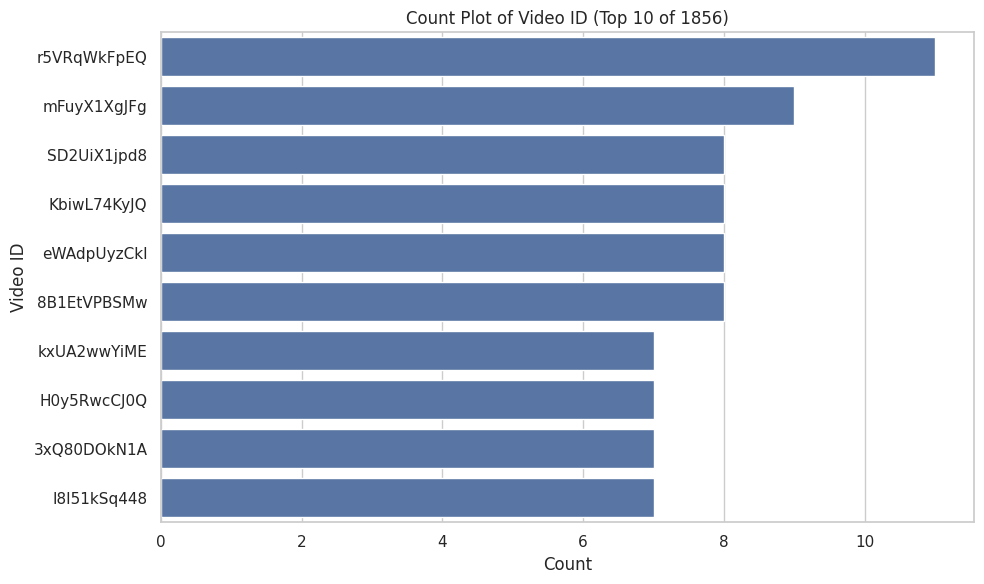


Categorical Column: Title, Unique Values: 1856


/tmp/ipykernel_9853/1968171671.py:98: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9853/1968171671.py:98: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9853/1968171671.py:98: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from fo

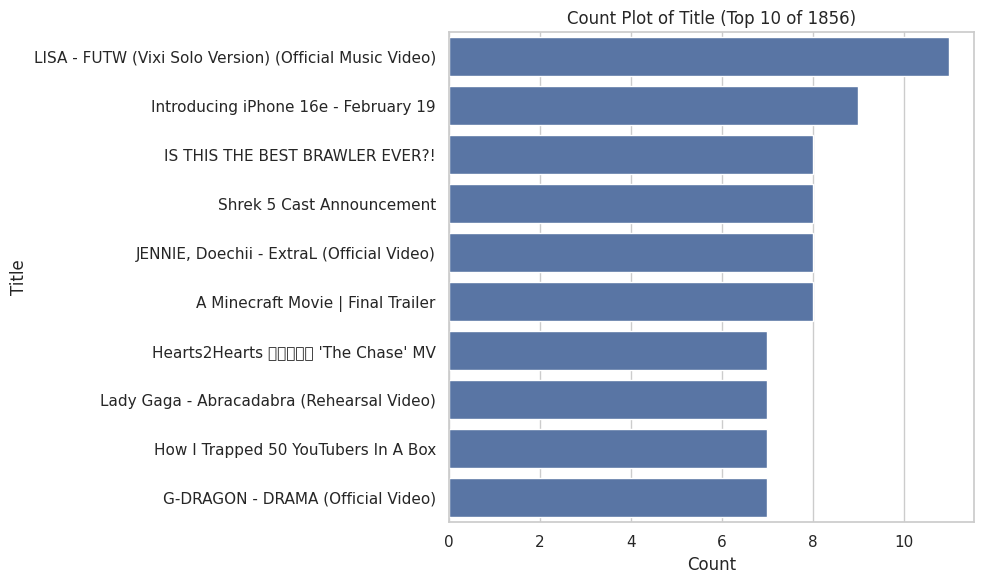


Categorical Column: Publication Time, Unique Values: 1799


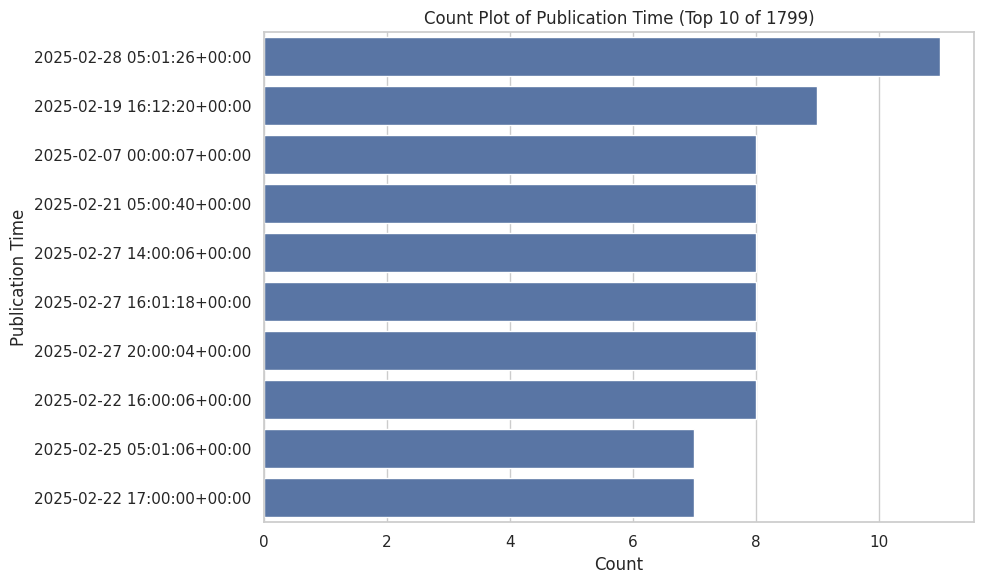


Categorical Column: Region, Unique Values: 13


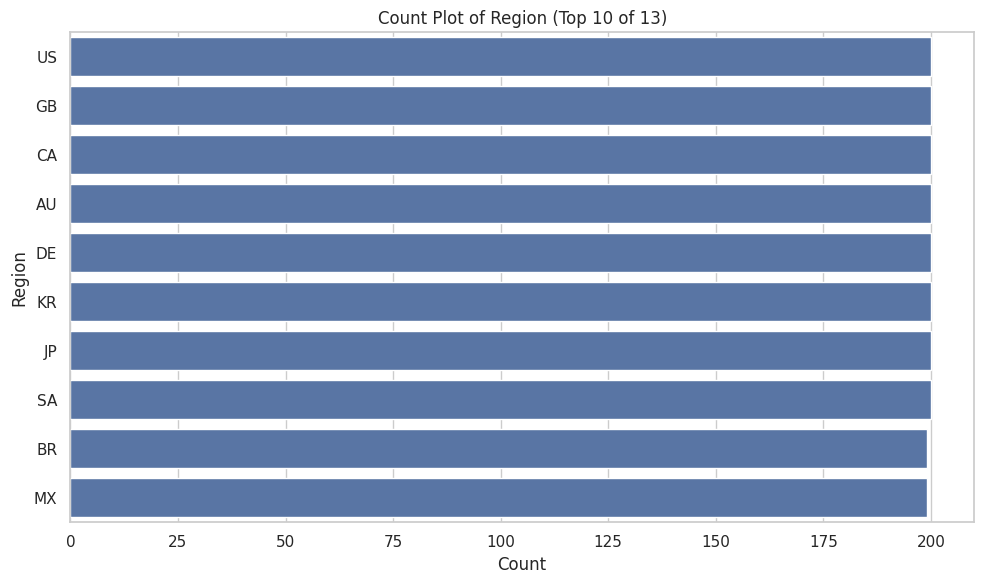

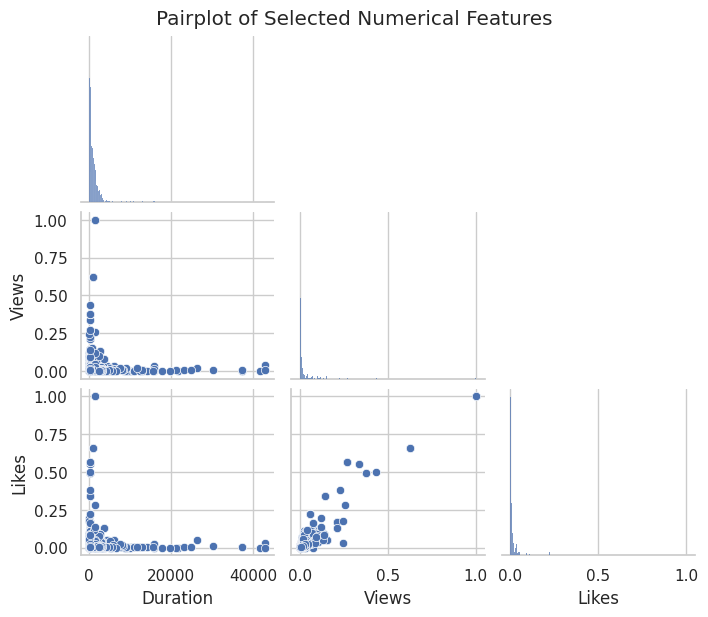

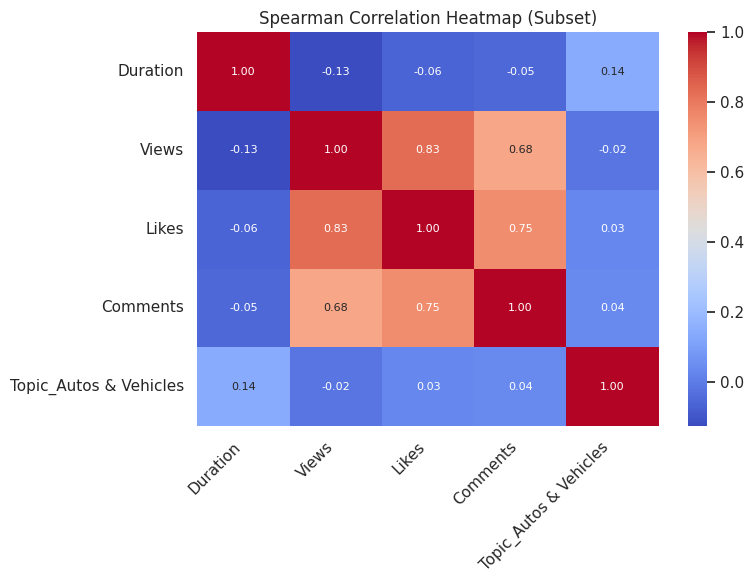

/tmp/ipykernel_9853/1968171671.py:137: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
/tmp/ipykernel_9853/1968171671.py:137: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
/tmp/ipykernel_9853/1968171671.py:137: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])



Detected datetime columns: []
No valid datetime columns found for time series plotting.


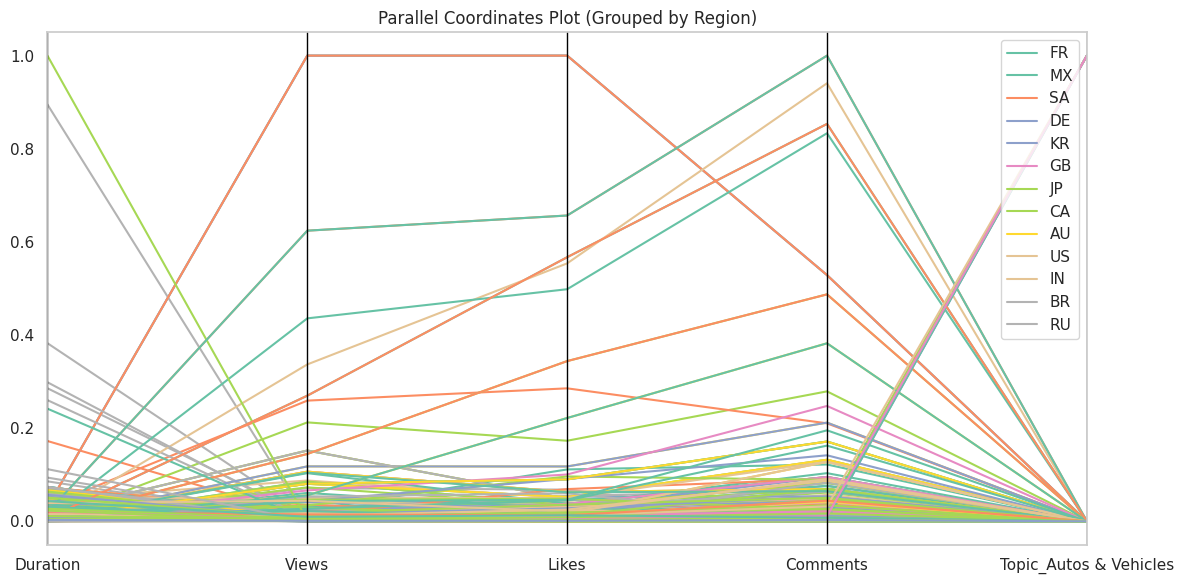


✅ EDA complete. Long categorical labels are now horizontal bars, and numeric columns like Duration are not misinterpreted.


In [4]:
###############################################################################
# Comprehensive EDA Script with Fixed Categorical Plots and Duration Handling
###############################################################################
# This script performs:
#   1. Data Loading & Basic Inspection (No Duplicate Removal)
#   2. Univariate Analysis (Numerical & Categorical with Better Formatting)
#   3. Bivariate Analysis (Pairplot & Spearman Correlation Heatmap)
#   4. Time Series Analysis (Avoids Numeric Columns Like `Duration`)
#   5. Multivariate Analysis (Parallel Coordinates)
###############################################################################

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

sns.set(style="whitegrid")

# -----------------------------------------------------------------------------
# Helper Function: Label Numeric Axis
# -----------------------------------------------------------------------------
def label_numeric_axis(col_name, data_series):
    """Returns a label indicating if the data is in [0,1] scale."""
    if pd.api.types.is_numeric_dtype(data_series):
        if data_series.max() <= 1 and data_series.min() >= 0:
            return f"{col_name} (Scaled 0–1)"
        else:
            return col_name
    else:
        return col_name

# -----------------------------------------------------------------------------
# 1. Data Loading & Basic Inspection (No Duplicate Removal)
# -----------------------------------------------------------------------------
df = pd.read_csv("processed_data.csv")  # Replace with correct file path

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

print("\nData Info:")
buf = io.StringIO()
df.info(buf=buf)
info_str = buf.getvalue()
print(info_str)

print("\nDescriptive Statistics (Numeric Columns):")
print(df.describe())

# -----------------------------------------------------------------------------
# 2. Univariate Analysis
# -----------------------------------------------------------------------------
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nShapiro-Wilk Test Results (first 500 rows per column):")
for col in numerical_cols:
    stat, p = shapiro(df[col].head(500))
    print(f"{col}: p-value = {p:.4e}")

# Histograms & Boxplots for first 3 numeric columns
for col in numerical_cols[:3]:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {col}')
    ax[0].set_xlabel(label_numeric_axis(col, df[col]))
    ax[0].set_ylabel("Count")
    
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    ax[1].set_xlabel(label_numeric_axis(col, df[col]))
    
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 3. Categorical Analysis (With Fixed Long Labels)
# -----------------------------------------------------------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
max_categories = 10

for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"\nCategorical Column: {col}, Unique Values: {n_unique}")
    
    if n_unique > max_categories:
        top_vals = df[col].value_counts().nlargest(max_categories).index
        data_filtered = df[df[col].isin(top_vals)]
        
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data_filtered, y=col, order=top_vals)  # FIX: Use y-axis for better readability
        plt.title(f'Count Plot of {col} (Top {max_categories} of {n_unique})')
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col} (All {n_unique})')
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# -----------------------------------------------------------------------------
# 4. Bivariate Analysis
# -----------------------------------------------------------------------------
# Pairplot (first 3 numeric columns)
if len(numerical_cols) > 1:
    pairplot_cols = numerical_cols[:3]
    g = sns.pairplot(df[pairplot_cols], corner=True, height=2, aspect=1.2)
    plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
    plt.show()
else:
    print("Not enough numerical columns for a pairplot.")

# Spearman Correlation Heatmap (first 5 numeric columns)
corr_cols = numerical_cols[:5]
corr_matrix = df[corr_cols].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Spearman Correlation Heatmap (Subset)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 5. Time Series Analysis (Avoids Numeric Columns Like `Duration`)
# -----------------------------------------------------------------------------
for col in df.columns:
    if col not in numerical_cols:
        try:
            df[col] = pd.to_datetime(df[col])
        except Exception:
            pass

datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print("\nDetected datetime columns:", datetime_cols)

if datetime_cols:
    for dt_col in datetime_cols:
        for num_col in numerical_cols:
            plt.figure(figsize=(10, 4))
            plt.plot(df[dt_col], df[num_col], marker='o', linestyle='-')
            plt.title(f"{num_col} over {dt_col}")
            
            ax = plt.gca()
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
            plt.xticks(rotation=45, ha='right')
            
            plt.xlabel(dt_col)
            plt.ylabel(label_numeric_axis(num_col, df[num_col]))
            plt.tight_layout()
            plt.show()
else:
    print("No valid datetime columns found for time series plotting.")

# -----------------------------------------------------------------------------
# 6. Multivariate Analysis (Parallel Coordinates with Better Class Column)
# -----------------------------------------------------------------------------
# Choose a better categorical column manually, e.g., Region or any relevant label
class_col = "Region"  # <-- ✅ Replace this manually with a suitable column

if class_col in df.columns and class_col in categorical_cols:
    sample_size = 500
    sample_df = df.sample(n=sample_size, random_state=42) if df.shape[0] > sample_size else df.copy()

    # Select numeric columns to visualize (first 5 for simplicity)
    parallel_cols = numerical_cols[:5]

    # Scale numeric columns
    scaler = MinMaxScaler()
    sample_df_scaled = sample_df.copy()
    sample_df_scaled[parallel_cols] = scaler.fit_transform(sample_df_scaled[parallel_cols])
    sample_df_scaled[class_col] = sample_df_scaled[class_col].astype(str)

    plt.figure(figsize=(12, 6))
    parallel_coordinates(sample_df_scaled[[class_col] + parallel_cols], class_col, colormap='Set2')
    plt.title(f"Parallel Coordinates Plot (Grouped by {class_col})")
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠ Column '{class_col}' not found or not suitable for grouping in parallel coordinates.")


print("\n✅ EDA complete. Long categorical labels are now horizontal bars, and numeric columns like Duration are not misinterpreted.")


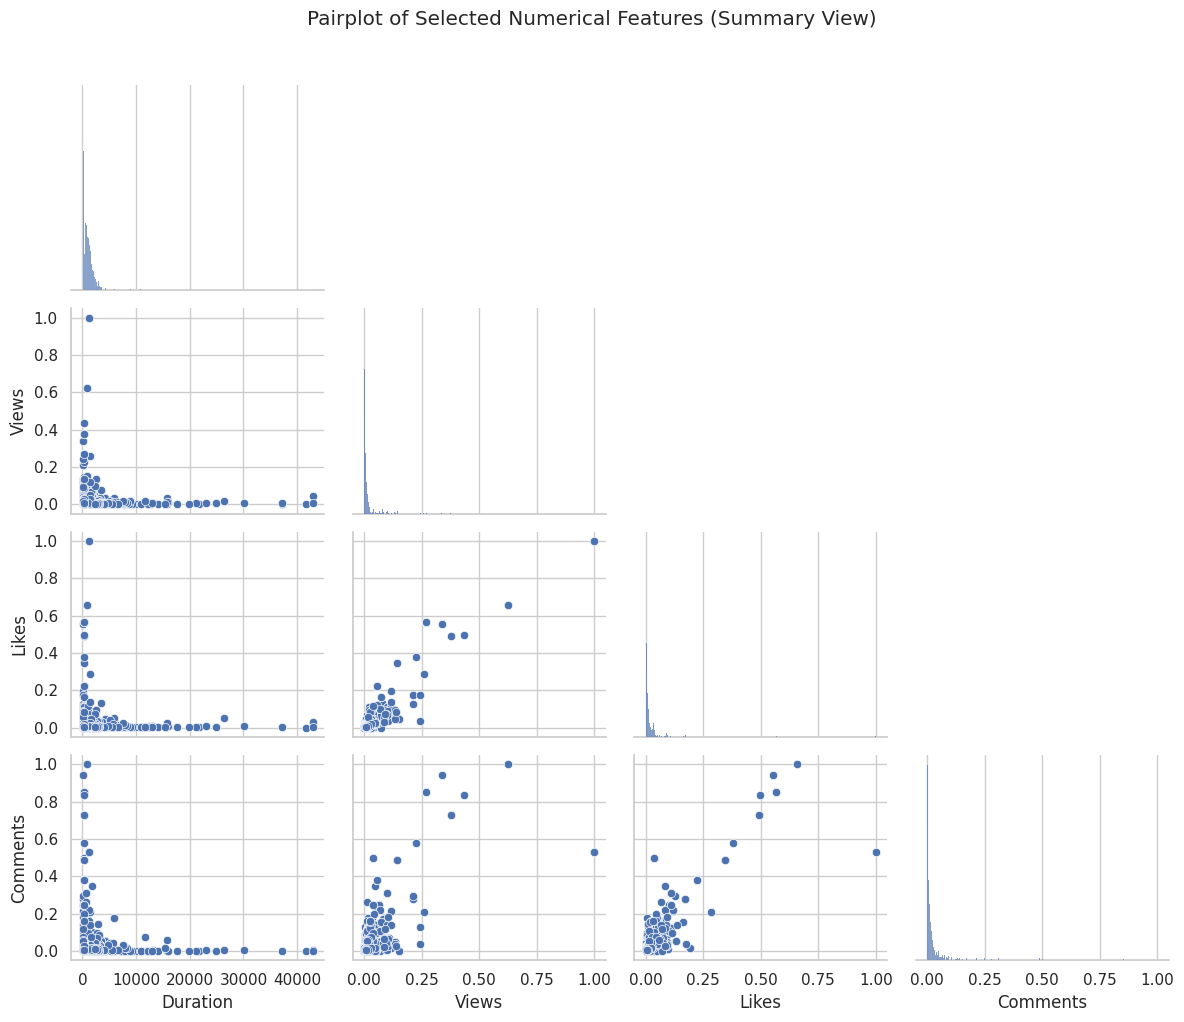

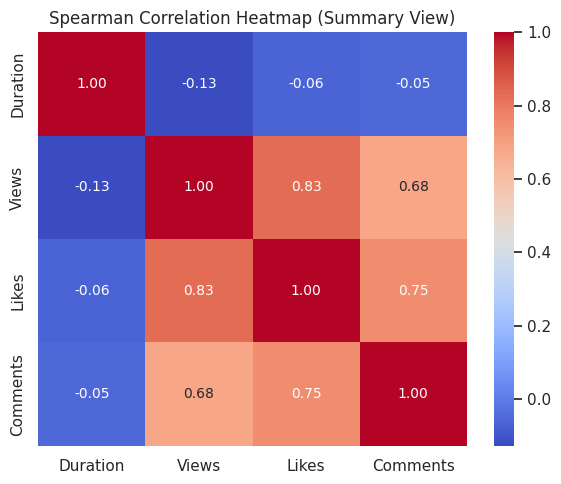

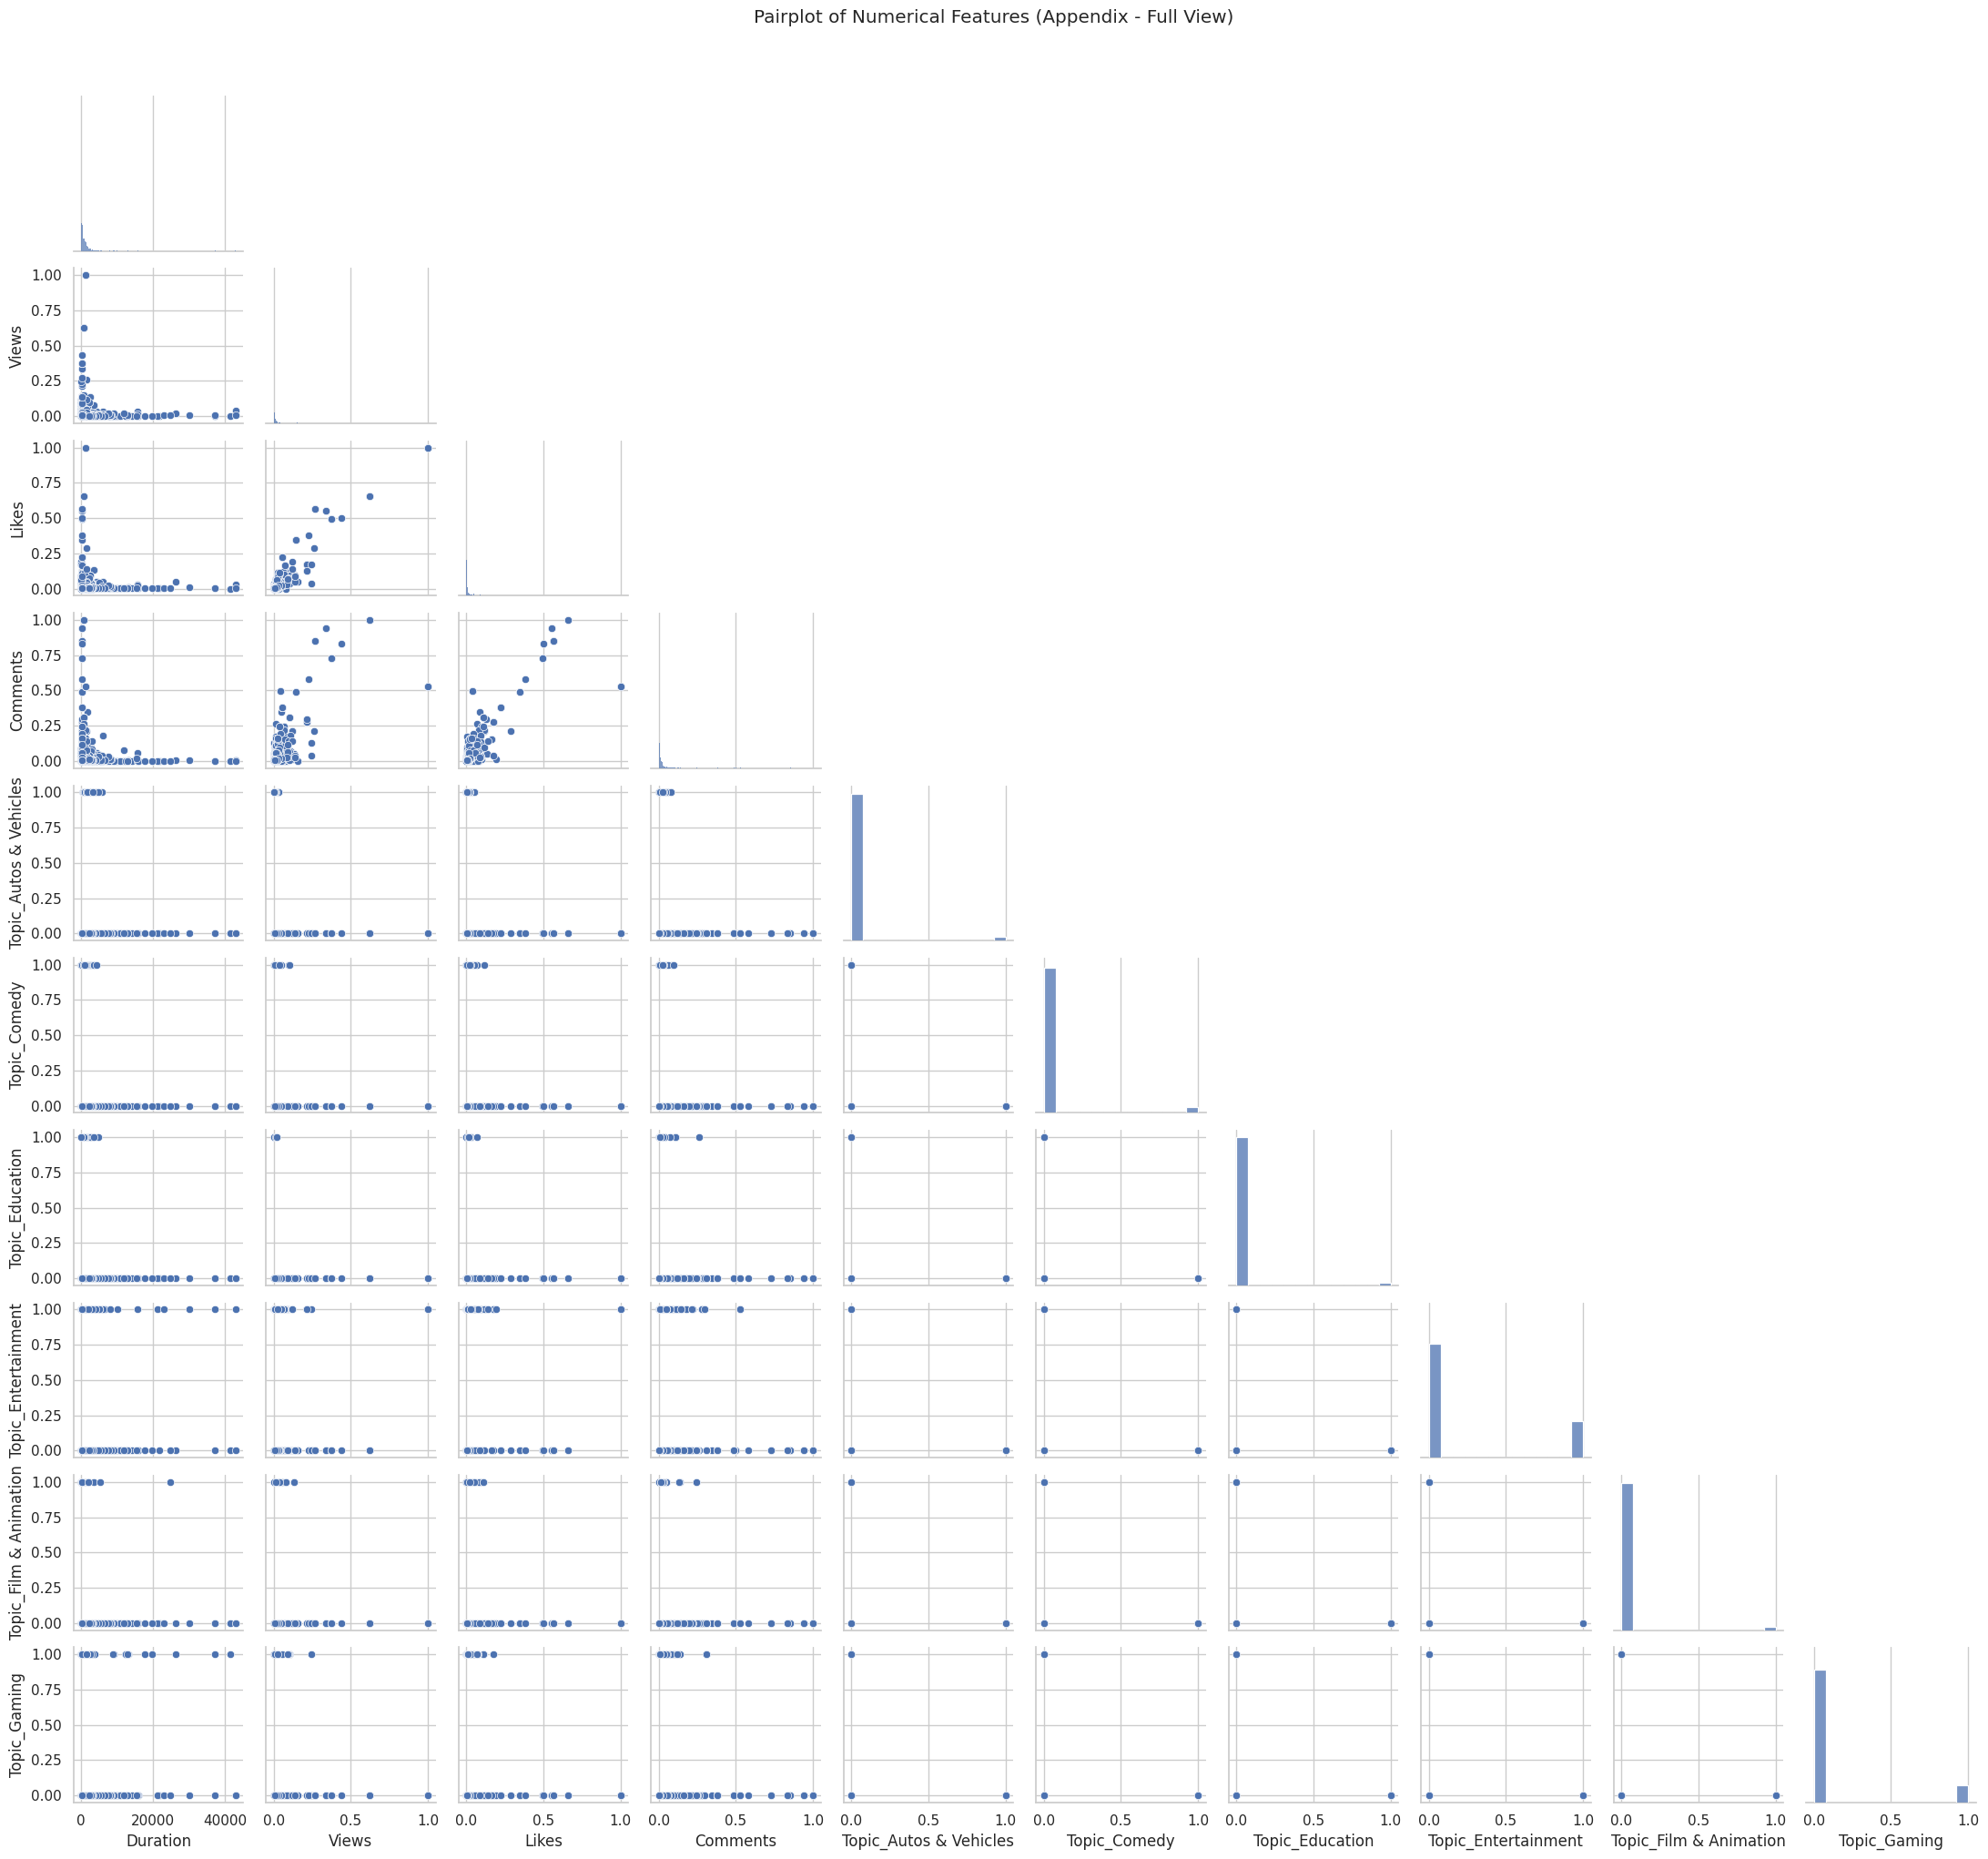

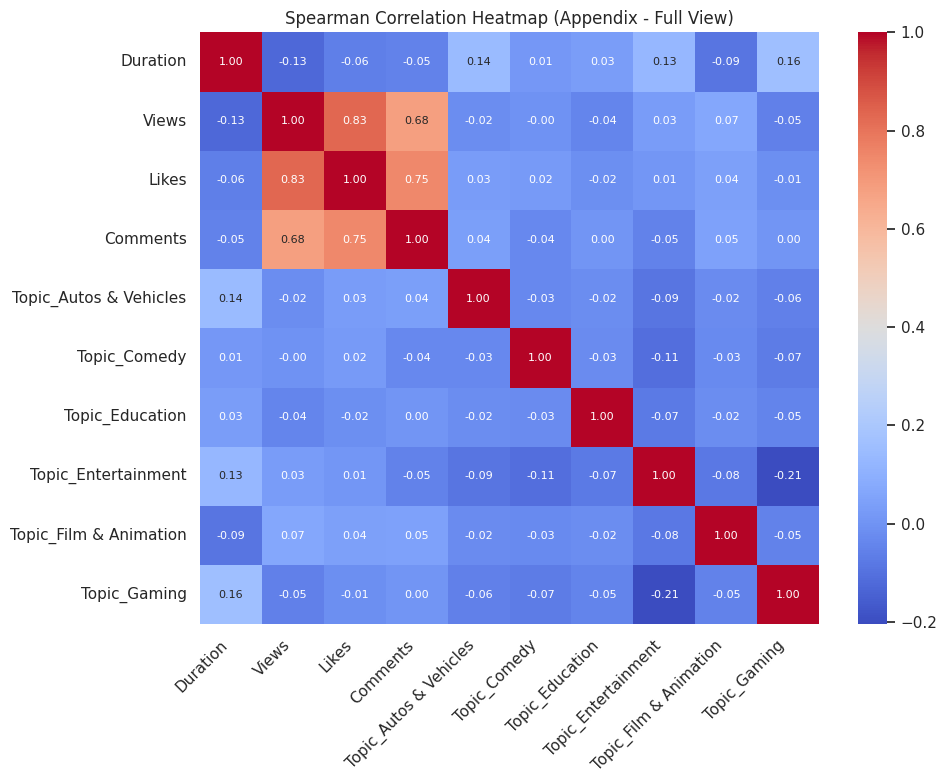

In [5]:
# 📌 Summary View - Focused Correlation & Pairplot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv("processed_data.csv")

# Select a small subset of important numeric features
summary_cols = ['Duration', 'Views', 'Likes', 'Comments']

# Pairplot (Summary View)
sns.pairplot(df[summary_cols], corner=True, height=2.5, aspect=1.2)
plt.suptitle("Pairplot of Selected Numerical Features (Summary View)", y=1.02)
plt.tight_layout()
plt.show()

# Spearman Correlation Heatmap (Summary View)
corr_matrix_summary = df[summary_cols].corr(method='spearman')
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix_summary, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Spearman Correlation Heatmap (Summary View)")
plt.tight_layout()
plt.show()


# 📎 Appendix - Full Correlation & Pairplot (Optional for Deeper Insights)

# Select a larger set of numeric columns (e.g., first 10 numeric features)
full_cols = df.select_dtypes(include='number').columns[:10]  # or use all if needed

# Pairplot (Appendix Full View)
sns.pairplot(df[full_cols], corner=True, height=2, aspect=1.1)
plt.suptitle("Pairplot of Numerical Features (Appendix - Full View)", y=1.02)
plt.tight_layout()
plt.show()

# Full Spearman Correlation Heatmap
corr_matrix_full = df[full_cols].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Spearman Correlation Heatmap (Appendix - Full View)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Total rows: 2510
Unique Video IDs: 1856
Duplicated Video IDs: 654

Top 10 most repeated Video IDs:
      Video ID  Frequency
0  r5VRqWkFpEQ         11
1  mFuyX1XgJFg          9
2  SD2UiX1jpd8          8
3  KbiwL74KyJQ          8
4  eWAdpUyzCkI          8
5  8B1EtVPBSMw          8
6  kxUA2wwYiME          7
7  H0y5RwcCJ0Q          7
8  3xQ80DOkN1A          7
9  I8I51kSq448          7


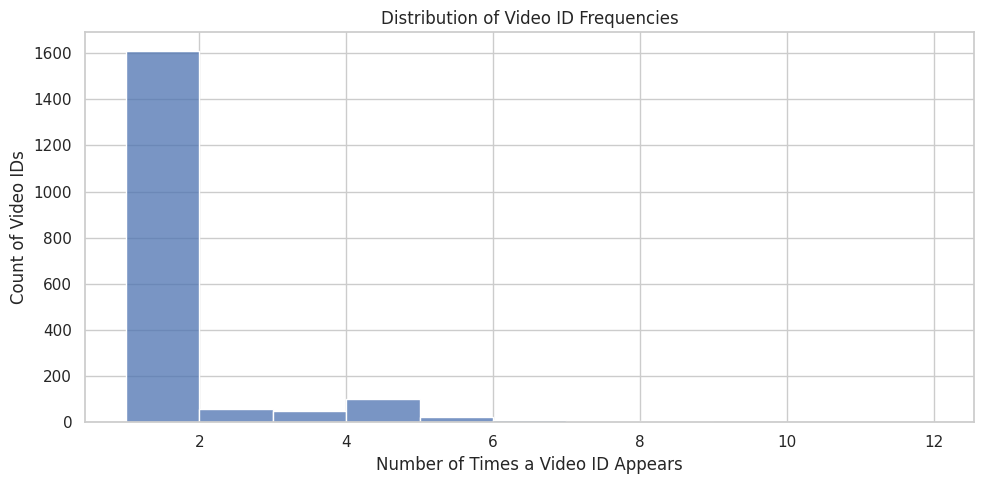

Total rows: 2510
Unique Video IDs: 1856
Duplicated Video IDs: 654

Top 10 most repeated Video IDs:
      Video ID  Frequency
0  r5VRqWkFpEQ         11
1  mFuyX1XgJFg          9
2  SD2UiX1jpd8          8
3  KbiwL74KyJQ          8
4  eWAdpUyzCkI          8
5  8B1EtVPBSMw          8
6  kxUA2wwYiME          7
7  H0y5RwcCJ0Q          7
8  3xQ80DOkN1A          7
9  I8I51kSq448          7


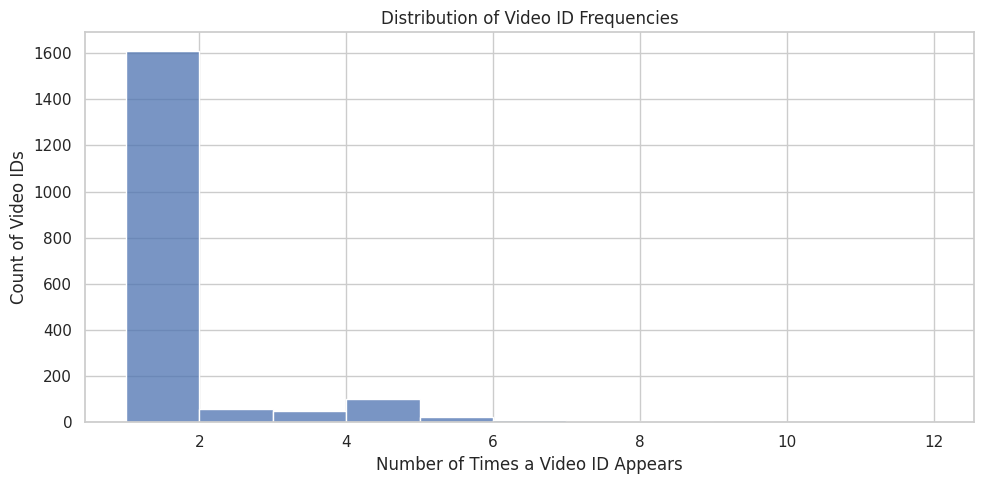

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Replace with correct path if needed
df = pd.read_csv("processed_data.csv")

# Count occurrences of each Video ID
video_id_counts = df['Video ID'].value_counts()

# Display basic statistics
print(f"Total rows: {len(df)}")
print(f"Unique Video IDs: {df['Video ID'].nunique()}")
print(f"Duplicated Video IDs: {(df.duplicated(subset='Video ID').sum())}")

# Create a DataFrame from the value counts
video_id_freq_df = video_id_counts.reset_index()
video_id_freq_df.columns = ['Video ID', 'Frequency']

# Show top 10 most frequent Video IDs
print("\nTop 10 most repeated Video IDs:")
print(video_id_freq_df.head(10))

# Plot distribution of Video ID frequencies
plt.figure(figsize=(10, 5))
sns.histplot(video_id_freq_df['Frequency'], bins=range(1, video_id_freq_df['Frequency'].max()+2), kde=False)
plt.title("Distribution of Video ID Frequencies")
plt.xlabel("Number of Times a Video ID Appears")
plt.ylabel("Count of Video IDs")
plt.tight_layout()
plt.show()

# Count occurrences of each Video ID
video_id_counts = df['Video ID'].value_counts()

# Display basic statistics
print(f"Total rows: {len(df)}")
print(f"Unique Video IDs: {df['Video ID'].nunique()}")
print(f"Duplicated Video IDs: {(df.duplicated(subset='Video ID').sum())}")

# Create a DataFrame from the value counts
video_id_freq_df = video_id_counts.reset_index()
video_id_freq_df.columns = ['Video ID', 'Frequency']

# Show top 10 most frequent Video IDs
print("\nTop 10 most repeated Video IDs:")
print(video_id_freq_df.head(10))

# Plot distribution of Video ID frequencies
plt.figure(figsize=(10, 5))
sns.histplot(video_id_freq_df['Frequency'], bins=range(1, video_id_freq_df['Frequency'].max()+2), kde=False)
plt.title("Distribution of Video ID Frequencies")
plt.xlabel("Number of Times a Video ID Appears")
plt.ylabel("Count of Video IDs")
plt.tight_layout()
plt.show()

